# crawl data

In [ ]:
import json

import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://fortune.com/asia/ranking/southeast-asia-500/search/"

soup = BeautifulSoup(requests.get(url).content, "html.parser")
data = soup.select_one("#__NEXT_DATA__")
data = json.loads(data.text)

items = data["props"]["pageProps"]["franchiseList"]["items"]

df = pd.DataFrame([{**i.pop("data"), **i} for i in items])
print(df)

improve dataset

In [ ]:
import json
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
data = df
data['Company'] = data['Company'].str.lower().str.replace(' ', '-')

# Write the processed data to a text file
txt_file = 'output.txt'
with open(txt_file, 'w') as file:
    for company in data['Company']:
        file.write(f"{company}\n")

print(f"Processed data has been written to {txt_file}")

In [ ]:
# Read company names from text file
with open('output.txt', 'r') as file:
    company_names = file.read().splitlines()

In [ ]:
# Function to extract name inside parentheses if present
def extract_name(name):
    if '(' in name and ')' in name:
        return name[name.find('(')+1:name.find(')')]
    return name

In [ ]:
def scrape_company_data(name):
    url = f"https://fortune.com/company/{name}/"
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to retrieve data for {name}")
        return {
            'CEO': None,
            'Website': None,
            'Market value ($M)': None
        }
    soup = BeautifulSoup(response.content, "html.parser")
    data = soup.select_one("#__NEXT_DATA__")
    if not data:
        print(f"No data found for {name}")
        return {
            'CEO': None,
            'Website': None,
            'Market value ($M)': None
        }
    data = json.loads(data.text)
    items = data["props"]["pageProps"]["company"]["companyInfo"]
    
    return {
        'CEO': items.get('CEO', None),
        'Website': items.get('Website', None),
        'Market value ($M)': items.get('Market value ($M)', None)
    }

In [ ]:
company_data = []
for name in company_names:
    clean_name = extract_name(name)
    data = scrape_company_data(clean_name)
    company_data.append(data)

In [ ]:
df = pd.DataFrame(company_data)
df.to_csv('company_data_2.csv', index=False)

Change collumn order

In [1]:
import pandas as pd

df = pd.DataFrame("sea_fortune_500.csv")

df.rename(columns={'name': 'company'}, inplace=True)

df.drop(columns=['order'], inplace=True)

desired_order = ['rank', 'company', 'Industry', 'Headquarters City', 'Country / Territory'] + \
                [col for col in df.columns if col not in ['rank', 'company', 'Industry', 'Headquarters City', 'Country / Territory']]
df = df[desired_order]


print(df)

   rank    company  Industry Headquarters City Country / Territory  \
0     1  Company A  Software          New York                 USA   
1     2  Company B   Banking     San Francisco                 USA   

   Revenues ($M)  Revenue Percent Change  Profits ($M)  \
0            100                      10            30   
1            200                      20            40   

   Profits Percent Change  Assets ($M)  Profitable  Female CEO   Sector  \
0                       5          500        True       False     Tech   
1                      10          600        True        True  Finance   

   Fastest Growing Companies  Change the World  \
0                       True             False   
1                      False              True   

   World's Most Admired Companies  Employees  Global 500       slug  
0                            True       1000        True  company-a  
1                            True       2000        True  company-b  


# preprocess / clean data

In [15]:
import pandas as pd

df = pd.read_csv("see_fortune_500_unprocess.csv")

df.head(10)

,Unnamed: 0,Rank,Company,Industry,Headquarters City,Country,Revenues ($M),Revenue Percent Change,Profits ($M),Profits Percent Change,...,Sector,Fastest Growing Companies,Change the World,World's Most Admired Companies,Employees,Global 500,slug,CEO,Website,Market value ($M)
0,0,1,trafigura-group,Trading,Singapore,Singapore,"$244,280.2",-23.3%,"$7,393.2",5.7%,...,Energy,no,no,no,"12,479",yes,/company/trafigura-group/,Jeremy Weir,https://www.trafigura.com,"$13,316"
1,1,2,ptt,Petroleum Refining,Bangkok,Thailand,"$90,418.7",-6%,"$3,221.1",23.5%,...,Energy,no,no,no,"30,772",yes,/company/ptt/,Kongkrapan Intarajang,https://www.pttplc.com,"$26,001"
2,2,3,pertamina,Petroleum Refining,Jakarta,Indonesia,"$75,787.8",-10.7%,"$4,441.4",16.7%,...,Energy,no,no,no,"40,415",yes,/company/pertamina/,Nicke Widyawati,https://pertamina.com/,"$19,354"
3,3,4,wilmar-international,Food Production,Singapore,Singapore,"$67,155.3",-8.5%,"$1,524.8",-36.5%,...,"Food, Beverages & Tobacco",no,no,yes,"100,000",yes,/company/wilmar-international/,Kuok Khoon Hong,https://www.wilmar-international.com,"$14,785"
4,4,5,olam-group,Food Production,Singapore,Singapore,"$35,953.1",-9.8%,$207.6,-54.5%,...,Wholesaler,no,no,no,"65,980",yes,/company/olam-international/,Sunny Verghese,https://www.olamgroup.com,"$3,289"
5,5,6,perusahaan-listrik-negara,Utilities: Gas and Electric,Jakarta,Indonesia,"$32,012.9",7.6%,"$1,446.7",49.6%,...,Energy,no,no,no,"51,245",no,/company/perusahaan-listrik-negara/,Darmawan Prasodjo,https://web.pln.co.id,"$18,059"
6,6,7,cp-all,Food and Drug Stores,Nonthaburi,Thailand,"$26,487.9",8.6%,$531.4,39.9%,...,Retailing,no,no,no,"85,096",no,/company/cp-all/,Yuthasak Poomsurakul,https://www.cpall.co.th,"$13,932"
7,7,8,flex,"Electronics, Electrical Equip",Singapore,Singapore,"$26,415",-7.3%,"$1,006",26.9%,...,Technology,no,no,no,"148,115",no,/company/flex/,Revathi Advaithi,https://flex.com,"$11,093"
8,8,9,san-miguel,Beverages,Mandaluyong City,Philippines,"$26,023.9",-6.1%,$3.6,101.5%,...,Industrials,no,no,no,"53,184",no,/company/san-miguel/,Ramon S. Ang,https://www.sanmiguel.com.ph,NaN
9,9,10,dbs-group-holdings,Commercial Banks,Singapore,Singapore,"$25,607.6",64.2%,"$7,494.9",26%,...,Financials,no,no,no,"40,770",no,/company/dbs-group-holdings/,Piyush Gupta,https://www.dbs.com,NaN


In [16]:
df = df.iloc[:, 1:]
df.pop("slug")
df.head(10)

,Rank,Company,Industry,Headquarters City,Country,Revenues ($M),Revenue Percent Change,Profits ($M),Profits Percent Change,Assets ($M),...,Female CEO,Sector,Fastest Growing Companies,Change the World,World's Most Admired Companies,Employees,Global 500,CEO,Website,Market value ($M)
0,1,trafigura-group,Trading,Singapore,Singapore,"$244,280.2",-23.3%,"$7,393.2",5.7%,"$83,383",...,no,Energy,no,no,no,"12,479",yes,Jeremy Weir,https://www.trafigura.com,"$13,316"
1,2,ptt,Petroleum Refining,Bangkok,Thailand,"$90,418.7",-6%,"$3,221.1",23.5%,"$100,741",...,no,Energy,no,no,no,"30,772",yes,Kongkrapan Intarajang,https://www.pttplc.com,"$26,001"
2,3,pertamina,Petroleum Refining,Jakarta,Indonesia,"$75,787.8",-10.7%,"$4,441.4",16.7%,"$91,124",...,yes,Energy,no,no,no,"40,415",yes,Nicke Widyawati,https://pertamina.com/,"$19,354"
3,4,wilmar-international,Food Production,Singapore,Singapore,"$67,155.3",-8.5%,"$1,524.8",-36.5%,"$61,809",...,no,"Food, Beverages & Tobacco",no,no,yes,"100,000",yes,Kuok Khoon Hong,https://www.wilmar-international.com,"$14,785"
4,5,olam-group,Food Production,Singapore,Singapore,"$35,953.1",-9.8%,$207.6,-54.5%,"$25,286",...,no,Wholesaler,no,no,no,"65,980",yes,Sunny Verghese,https://www.olamgroup.com,"$3,289"
5,6,perusahaan-listrik-negara,Utilities: Gas and Electric,Jakarta,Indonesia,"$32,012.9",7.6%,"$1,446.7",49.6%,"$108,518",...,no,Energy,no,no,no,"51,245",no,Darmawan Prasodjo,https://web.pln.co.id,"$18,059"
6,7,cp-all,Food and Drug Stores,Nonthaburi,Thailand,"$26,487.9",8.6%,$531.4,39.9%,"$26,972",...,no,Retailing,no,no,no,"85,096",no,Yuthasak Poomsurakul,https://www.cpall.co.th,"$13,932"
7,8,flex,"Electronics, Electrical Equip",Singapore,Singapore,"$26,415",-7.3%,"$1,006",26.9%,"$18,257",...,yes,Technology,no,no,no,"148,115",no,Revathi Advaithi,https://flex.com,"$11,093"
8,9,san-miguel,Beverages,Mandaluyong City,Philippines,"$26,023.9",-6.1%,$3.6,101.5%,"$44,401",...,no,Industrials,no,no,no,"53,184",no,Ramon S. Ang,https://www.sanmiguel.com.ph,NaN
9,10,dbs-group-holdings,Commercial Banks,Singapore,Singapore,"$25,607.6",64.2%,"$7,494.9",26%,"$560,586",...,no,Financials,no,no,no,"40,770",no,Piyush Gupta,https://www.dbs.com,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Rank                            500 non-null    int64 
 1   Company                         500 non-null    object
 2   Industry                        500 non-null    object
 3   Headquarters City               500 non-null    object
 4   Country                         500 non-null    object
 5   Revenues ($M)                   500 non-null    object
 6   Revenue Percent Change          498 non-null    object
 7   Profits ($M)                    500 non-null    object
 8   Profits Percent Change          500 non-null    object
 9   Assets ($M)                     500 non-null    object
 10  Profitable                      500 non-null    object
 11  Female CEO                      500 non-null    object
 12  Sector                          500 non-null    ob

In [4]:
# Group the data by unique values in the specified columns
unique_values = {}
for column in ['Sector', 'Industry', 'Headquarters City', 'Country']:
    unique_values[column] = df[column].unique()

# Print unique values to help with creating the translation dictionary
for column, values in unique_values.items():
    print(f"Unique values in '{column}':")
    for value in values:
        print(value)
    print()

Unique values in 'Sector':
Energy
Food, Beverages & Tobacco
Wholesaler
Retailing
Technology
Industrials
Financials
Chemicals
Materials
Transportation
Telecommunications
Aerospace & Defense
Business Services
Hotels, Restaurants & Leisure
Engineering & Construction
Health Care
Motor Vehicles & Parts
Household Products
Media
Apparel

Unique values in 'Industry':
Trading
Petroleum Refining
Food Production
Utilities: Gas and Electric
Food and Drug Stores
Electronics, Electrical Equip
Beverages
Commercial Banks
Chemicals
Building Materials, Glass
Airlines
Internet Services and Retailing
Diversified Financials
Telecommunications
Tobacco
Engineering & Construction
General Merchandisers
Mining, Crude-Oil Production
Real Estate
Hotels, Casinos, Resorts
Shipping
Industrial Machinery
Specialty Retailers: Other
Health Care: Medical Facilities
Food Services
Oil and Gas Equipment, Services
Forest and Paper Products
Diversified Outsourcing Services
Insurance: Life, Health (stock)
Metals
Trucking, Truc

In [18]:
translations = {
    'Sector': {
        'Energy': 'Năng lượng',
        'Food, Beverages & Tobacco': 'Thực phẩm, Đồ uống & Thuốc lá',
        'Wholesaler': 'Bán buôn',
        'Retailing': 'Bán lẻ',
        'Technology': 'Công nghệ',
        'Industrials': 'Công nghiệp',
        'Financials': 'Tài chính',
        'Chemicals': 'Hóa chất',
        'Materials': 'Vật liệu',
        'Transportation': 'Vận tải',
        'Telecommunications': 'Viễn thông',
        'Aerospace & Defense': 'Hàng không vũ trụ & Quốc phòng',
        'Business Services': 'Dịch vụ kinh doanh',
        'Hotels, Restaurants & Leisure': 'Khách sạn, Nhà hàng & Giải trí',
        'Engineering & Construction': 'Kỹ thuật & Xây dựng',
        'Health Care': 'Chăm sóc sức khỏe',
        'Motor Vehicles & Parts': 'Xe cộ & Phụ tùng',
        'Household Products': 'Sản phẩm gia dụng',
        'Media': 'Truyền thông',
        'Apparel': 'May mặc'
    },
    'Industry': {
        'Trading': 'Thương mại',
        'Petroleum Refining': 'Lọc dầu',
        'Food Production': 'Sản xuất thực phẩm',
        'Utilities: Gas and Electric': 'Tiện ích: Khí đốt và Điện',
        'Food and Drug Stores': 'Cửa hàng Thực phẩm và Dược phẩm',
        'Electronics, Electrical Equip': 'Điện tử, Thiết bị Điện',
        'Beverages': 'Đồ uống',
        'Commercial Banks': 'Ngân hàng Thương mại',
        'Chemicals': 'Hóa chất',
        'Building Materials, Glass': 'Vật liệu Xây dựng, Kính',
        'Airlines': 'Hàng không',
        'Internet Services and Retailing': 'Dịch vụ Internet và Bán lẻ',
        'Diversified Financials': 'Tài chính Đa ngành',
        'Telecommunications': 'Viễn thông',
        'Tobacco': 'Thuốc lá',
        'Engineering & Construction': 'Kỹ thuật & Xây dựng',
        'General Merchandisers': 'Thương gia Tổng hợp',
        'Mining, Crude-Oil Production': 'Khai thác, Sản xuất Dầu thô',
        'Real Estate': 'Bất động sản',
        'Hotels, Casinos, Resorts': 'Khách sạn, Sòng bạc, Khu nghỉ dưỡng',
        'Shipping': 'Vận chuyển',
        'Industrial Machinery': 'Máy móc Công nghiệp',
        'Specialty Retailers: Other': 'Nhà bán lẻ Chuyên ngành: Khác',
        'Health Care: Medical Facilities': 'Chăm sóc sức khỏe: Cơ sở Y tế',
        'Food Services': 'Dịch vụ Ăn uống',
        'Oil and Gas Equipment, Services': 'Thiết bị Dầu khí, Dịch vụ',
        'Forest and Paper Products': 'Sản phẩm từ Rừng và Giấy',
        'Diversified Outsourcing Services': 'Dịch vụ Gia công Đa ngành',
        'Insurance: Life, Health (stock)': 'Bảo hiểm: Nhân thọ, Sức khỏe (cổ phần)',
        'Metals': 'Kim loại',
        'Trucking, Truck Leasing': 'Vận tải đường bộ, Cho thuê xe tải',
        'Transportation and Logistics': 'Vận tải và Hậu cần',
        'Equipment Leasing': 'Cho thuê Thiết bị',
        'Construction and Farm Machinery': 'Máy móc Xây dựng và Nông nghiệp',
        'Information Technology Services': 'Dịch vụ Công nghệ Thông tin',
        'Pharmaceuticals': 'Dược phẩm',
        'Motor Vehicles & Parts': 'Xe cộ & Phụ tùng',
        'Food Consumer Products': 'Sản phẩm Tiêu dùng Thực phẩm',
        'Energy': 'Năng lượng',
        'Mail, Package, and Freight Delivery': 'Chuyển phát Thư, Hàng hóa và Vận tải',
        'Electronics, Electrical Equip.': 'Điện tử, Thiết bị Điện.',
        'Homebuilders': 'Nhà xây dựng',
        'Wholesalers: Diversified': 'Nhà bán buôn: Đa ngành',
        'Wholesalers: Electronics and Office Equipment': 'Nhà bán buôn: Điện tử và Thiết bị Văn phòng',
        'Entertainment': 'Giải trí',
        'Insurance: Life, Health (Mutual)': 'Bảo hiểm: Nhân thọ, Sức khỏe (Tương hỗ)',
        'Wholesalers: Food and Grocery': 'Nhà bán buôn: Thực phẩm và Tạp hóa',
        'Automotive Retailing, Services': 'Bán lẻ Ô tô, Dịch vụ',
        'Financial Data Services': 'Dịch vụ Dữ liệu Tài chính',
        'Semiconductors and Other Electronic Components': 'Chất bán dẫn và Linh kiện Điện tử khác',
        'Apparel': 'May mặc',
        'Railroads': 'Đường sắt',
        'Packaging, Containers': 'Đóng gói và dán nhãn, Container',
        'Insurance: Property and Casualty (stock)': 'Bảo hiểm: Tài sản và Tổn thất (cổ phần)',
        'Transportation Equipment': 'Thiết bị Vận tải',
        'Medical Products and Equipment': 'Sản phẩm và Thiết bị Y tế',
        'Specialty Retailers: Apparel': 'Nhà bán lẻ Chuyên ngành: Trang phục'
    },
    'Headquarters City': {
        'Singapore': 'Singapore',
        'Bangkok': 'Bangkok',
        'Jakarta': 'Jakarta',
        'Nonthaburi': 'Nonthaburi',
        'Mandaluyong City': 'Thành phố Mandaluyong',
        'Kuala Lumpur': 'Kuala Lumpur',
        'Hanoi': 'Hà Nội',
        'Petaling Jaya': 'Petaling Jaya',
        'Pasay City': 'Thành phố Pasay',
        'Bandung': 'Bandung',
        'Rayong': 'Rayong',
        'Pasig': 'Pasig',
        'Kediri': 'Kediri',
        'Barito Utara': 'Barito Utara',
        'Tangerang': 'Tangerang',
        'Quang Ngai': 'Quảng Ngãi',
        'Makati City': 'Thành phố Makati',
        'Taguig City': 'Thành phố Taguig',
        'Ipoh': 'Ipoh',
        'Jakarta Pusat': 'Jakarta Pusat',
        'Hung Yen': 'Hưng Yên',
        'Thu Dau Mot': 'Thủ Dầu Một',
        'Tuy Hoa': 'Tuy Hòa',
        'Jakarta Barat': 'Jakarta Barat',
        'Mueang Samut Sakhon': 'Mueang Samut Sakhon',
        'Manila': 'Manila',
        'Ho Chi Minh City': 'Thành phố Hồ Chí Minh',
        'Quezon City': 'Thành phố Quezon',
        'Shah Alam': 'Shah Alam',
        'Taguig': 'Taguig',
        'Putrajaya': 'Putrajaya',
        'Hat Yai': 'Hat Yai',
        'Santa Rosa': 'Santa Rosa',
        'Subang Jaya': 'Subang Jaya',
        'Di An': 'Dĩ An',
        'Pasig City': 'Thành phố Pasig',
        'Pasir Gudang': 'Pasir Gudang',
        'Miri': 'Miri',
        'Sepang': 'Sepang',
        'Tan Chau': 'Tân Châu',
        'Seri Kembangan': 'Seri Kembangan',
        'Senai': 'Senai',
        'Jakarta Selatan': 'Jakarta Selatan',
        'Mueang Rayong': 'Mueang Rayong',
        'Kudus': 'Kudus',
        'Klang': 'Klang',
        'Mueang Roi Et': 'Mueang Roi Et',
        'Ubon Ratchathani': 'Ubon Ratchathani',
        'Ayutthaya': 'Ayutthaya',
        'Paranaque City': 'Thành phố Paranaque',
        'Binh Duong': 'Bình Dương',
        'Phnom Penh': 'Phnom Penh',
        'Prakhon Chai': 'Prakhon Chai',
        'Bekasi': 'Bekasi',
        'Pangkalan Bun': 'Pangkalan Bun',
        'Mandaue City': 'Mandaue City',
        'Chachoengsao': 'Chachoengsao',
        'Pathum Thani': 'Pathum Thani',
        'Bang Sao Thong': 'Bang Sao Thong',
        'Long Xuyen': 'Long Xuyên',
        'Angeles': 'Angeles',
        'Hai Duong': 'Hải Dương',
        'Vinh': 'Vinh',
        'South Tangerang': 'South Tangerang',
        'Prachin Buri': 'Prachin Buri',
        'Nakhon Sawan': 'Nakhon Sawan',
        'Batu Pahat': 'Batu Pahat',
        'Kuching': 'Kuching',
        'Ben Luc': 'Bến Lức',
        'George Town': 'George Town (Pulau Pinang)',
        'Perai': 'Perai',
        'Ca Mau': 'Cà Mau',
        'Ha Long': 'Hạ Long',
        'Jakarta Utara': 'Jakarta Utara',
        'Johor Bahru': 'Johor Bahru',
        'Hai phong': 'Hải Phòng',
        'Port Klang': 'Port Klang',
        'Bac Ninh': 'Bắc Ninh',
        'Surabaya': 'Surabaya'
    },
    'Country': {
        'Singapore': 'Singapore',
        'Thailand': 'Thái Lan',
        'Indonesia': 'Indonesia',
        'Philippines': 'Philippines',
        'Malaysia': 'Malaysia',
        'Vietnam': 'Việt Nam',
        'Cambodia': 'Campuchia'
    }
}


In [20]:
# translate data to vietnamese
def translate_column(column_name, translations):
    df[column_name] = df[column_name].map(translations[column_name]).fillna(df[column_name])

# Translate specified columns
for column in ['Sector', 'Industry', 'Headquarters City', 'Country']:
    translate_column(column, translations)


# output_path = 'data_translated.csv'
# df.to_csv(output_path, index=False)

In [21]:
# Convert all column names into lowercase
df.columns = df.columns.str.strip().str.lower()

In [22]:
# Replace null values for the CEO, website, and revenue changes column
df['ceo'].fillna('N/A', inplace= True)
df['website'].fillna('N/A', inplace= True)
df['revenue percent change'].fillna('N/A', inplace= True)

In [23]:
import numpy as np

df['ceo_woman'] = np.where(df['female ceo'] == 'yes', True, False)
df['fastest_growing_company']=np.where(df['fastest growing companies']== 'yes', True, False)
df['change_the_world']=np.where(df['change the world']=='yes', True, False)
df['world_most_admired_company']=np.where(df["world's most admired companies"]=='yes', True, False)
df['profitable']=np.where(df['profitable']=='yes', True, False)
df['global_500']=np.where(df['global 500']=='yes', True, False)

In [24]:
df.drop(columns=['female ceo', 'fastest growing companies', 'change the world', "world's most admired companies", 'global 500'], inplace=True)

In [25]:
# change data type
# df['Market value ($M)'] = df['Market value ($M)'].replace('[\$,]', '', regex=True).astype(float)
# df['Revenues ($M)'] = df['Revenues ($M)'].replace('[\$,]', '', regex=True).astype(float)
# df['Profits ($M)'] = df['Profits ($M)'].replace('[\$,]', '', regex=True).astype(float)
# df['Assets ($M)'] = df['Assets ($M)'].replace('[\$,]', '', regex=True).astype(float)

df['market value ($m)'] = df['market value ($m)'].replace('[\$,]', '', regex=True).astype(float)
df['revenues ($m)'] = df['revenues ($m)'].replace('[\$,]', '', regex=True).astype(float)
df['profits ($m)'] = df['profits ($m)'].replace('[\$,]', '', regex=True).astype(float)
df['assets ($m)'] = df['assets ($m)'].replace('[\$,]', '', regex=True).astype(float)
df['employees'] = df['employees'].replace('[\,]', '', regex=True).astype(float)

df['revenue percent change'] = df['revenue percent change'].replace('N/A', np.nan)
df['revenue percent change'] = df['revenue percent change'].str.replace('%','').astype(float)
df['profits percent change'] = df['profits percent change'].str.replace('%','').astype(float)

df['revenue percent change'] = df['revenue percent change'].fillna(0)

In [10]:
df.to_csv("sea_fortune_500_translated.csv")

In [27]:
df.isnull().any()

rank                          False
company                       False
industry                      False
headquarters city             False
country                       False
revenues ($m)                 False
revenue percent change        False
profits ($m)                  False
profits percent change        False
assets ($m)                   False
profitable                    False
sector                        False
employees                     False
ceo                           False
website                       False
market value ($m)              True
ceo_woman                     False
fastest_growing_company       False
change_the_world              False
world_most_admired_company    False
global_500                    False
dtype: bool

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rank                        500 non-null    int64  
 1   company                     500 non-null    object 
 2   industry                    500 non-null    object 
 3   headquarters city           500 non-null    object 
 4   country                     500 non-null    object 
 5   revenues ($m)               500 non-null    float64
 6   revenue percent change      500 non-null    float64
 7   profits ($m)                500 non-null    float64
 8   profits percent change      500 non-null    float64
 9   assets ($m)                 500 non-null    float64
 10  profitable                  500 non-null    bool   
 11  sector                      500 non-null    object 
 12  employees                   500 non-null    float64
 13  ceo                         500 non

In [51]:
df[( df["profits ($m)"]<0 )].count()

rank                          52
company                       52
industry                      52
headquarters city             52
country                       52
revenues ($m)                 52
revenue percent change        52
profits ($m)                  52
profits percent change        52
assets ($m)                   52
profitable                    52
sector                        52
employees                     52
ceo                           52
website                       52
market value ($m)             52
ceo_woman                     52
fastest_growing_company       52
change_the_world              52
world_most_admired_company    52
global_500                    52
dtype: int64

# Analysis

In [26]:
import plotly.express as px
import plotly.graph_objects as go


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

In [11]:
country_data =  {
    'Country': ['Singapore', 'Thái Lan', 'Indonesia', 'Philippines', 'Malaysia', 'Việt Nam', 'Campuchia'],
    'Latitude': [1.3521, 15.8700, -0.7893, 12.8797, 4.2105, 18.0285, 12.5657],
    'Longitude': [103.8198, 100.9925, 113.9213, 121.7740, 101.9758, 108.2772, 104.9910]
}

In [16]:
# city coordinates
city_coords = {
    'Singapore': {'lat': 1.290270, 'lon': 103.851959, 'vn_name': 'Singapore'},
    'Bangkok': {'lat': 13.7563, 'lon': 100.5018, 'vn_name': 'Bangkok'},
    'Jakarta': {'lat': -6.2088, 'lon': 106.8456, 'vn_name': 'Jakarta'},
    'Nonthaburi': {'lat': 13.8591, 'lon': 100.5144, 'vn_name': 'Nonthaburi'},
    'Thành phố Mandaluyong': {'lat': 14.5794, 'lon': 121.0359, 'vn_name': 'Thành phố Mandaluyong'},
    'Kuala Lumpur': {'lat': 3.1390, 'lon': 101.6869, 'vn_name': 'Kuala Lumpur'},
    'Hà Nội': {'lat': 21.0285, 'lon': 105.8542, 'vn_name': 'Hà Nội'},
    'Petaling Jaya': {'lat': 3.0840, 'lon': 101.5820, 'vn_name': 'Petaling Jaya'},
    'Thành phố Pasay': {'lat': 14.5378, 'lon': 120.9921, 'vn_name': 'Thành phố Pasay'},
    'Bandung': {'lat': -6.9175, 'lon': 107.6191, 'vn_name': 'Bandung'},
    'Rayong': {'lat': 12.6814, 'lon': 101.2780, 'vn_name': 'Rayong'},
    'Pasig': {'lat': 14.5764, 'lon': 121.0851, 'vn_name': 'Pasig'},
    'Kediri': {'lat': -7.8480, 'lon': 112.0165, 'vn_name': 'Kediri'},
    'Barito Utara': {'lat': -0.9539, 'lon': 114.9378, 'vn_name': 'Barito Utara'},
    'Tangerang': {'lat': -6.2024, 'lon': 106.6527, 'vn_name': 'Tangerang'},
    'Quảng Ngãi': {'lat': 15.1204, 'lon': 108.7923, 'vn_name': 'Quảng Ngãi'},
    'Thành phố Makati': {'lat': 14.5547, 'lon': 121.0244, 'vn_name': 'Thành phố Makati'},
    'Thành phố Taguig': {'lat': 14.5176, 'lon': 121.0509, 'vn_name': 'Thành phố Taguig'},
    'Ipoh': {'lat': 4.5975, 'lon': 101.0901, 'vn_name': 'Ipoh'},
    'Jakarta Pusat': {'lat': -6.1862, 'lon': 106.8344, 'vn_name': 'Jakarta Pusat'},
    'Hưng Yên': {'lat': 20.6461, 'lon': 106.0510, 'vn_name': 'Hưng Yên'},
    'Thủ Dầu Một': {'lat': 10.9804, 'lon': 106.6519, 'vn_name': 'Thủ Dầu Một'},
    'Tuy Hòa': {'lat': 13.0957, 'lon': 109.3200, 'vn_name': 'Tuy Hòa'},
    'Jakarta Barat': {'lat': -6.1767, 'lon': 106.7555, 'vn_name': 'Jakarta Barat'},
    'Mueang Samut Sakhon': {'lat': 13.5474, 'lon': 100.2744, 'vn_name': 'Mueang Samut Sakhon'},
    'Manila': {'lat': 14.5995, 'lon': 120.9842, 'vn_name': 'Manila'},
    'Thành phố Hồ Chí Minh': {'lat': 10.8231, 'lon': 106.6297, 'vn_name': 'Thành phố Hồ Chí Minh'},
    'Thành phố Quezon': {'lat': 14.6760, 'lon': 121.0437, 'vn_name': 'Thành phố Quezon'},
    'Shah Alam': {'lat': 3.0738, 'lon': 101.5183, 'vn_name': 'Shah Alam'},
    'Taguig': {'lat': 14.5204, 'lon': 121.0583, 'vn_name': 'Taguig'},
    'Putrajaya': {'lat': 2.9264, 'lon': 101.6964, 'vn_name': 'Putrajaya'},
    'Hat Yai': {'lat': 7.0084, 'lon': 100.4743, 'vn_name': 'Hat Yai'},
    'Santa Rosa': {'lat': 14.3122, 'lon': 121.1111, 'vn_name': 'Santa Rosa'},
    'Subang Jaya': {'lat': 3.0738, 'lon': 101.5896, 'vn_name': 'Subang Jaya'},
    'Dĩ An': {'lat': 10.9021, 'lon': 106.7676, 'vn_name': 'Dĩ An'},
    'Thành phố Pasig': {'lat': 14.5764, 'lon': 121.0851, 'vn_name': 'Thành phố Pasig'},
    'Pasir Gudang': {'lat': 1.4622, 'lon': 103.8828, 'vn_name': 'Pasir Gudang'},
    'Miri': {'lat': 4.3991, 'lon': 113.9918, 'vn_name': 'Miri'},
    'Sepang': {'lat': 2.6897, 'lon': 101.7532, 'vn_name': 'Sepang'},
    'Tân Châu': {'lat': 10.7016, 'lon': 105.2436, 'vn_name': 'Tân Châu'},
    'Seri Kembangan': {'lat': 3.0337, 'lon': 101.7037, 'vn_name': 'Seri Kembangan'},
    'Senai': {'lat': 1.6000, 'lon': 103.6333, 'vn_name': 'Senai'},
    'Jakarta Selatan': {'lat': -6.2757, 'lon': 106.7980, 'vn_name': 'Jakarta Selatan'},
    'Mueang Rayong': {'lat': 12.6814, 'lon': 101.2780, 'vn_name': 'Mueang Rayong'},
    'Kudus': {'lat': -6.8044, 'lon': 110.8405, 'vn_name': 'Kudus'},
    'Klang': {'lat': 3.0410, 'lon': 101.4438, 'vn_name': 'Klang'},
    'Mueang Roi Et': {'lat': 16.0545, 'lon': 103.6534, 'vn_name': 'Mueang Roi Et'},
    'Ubon Ratchathani': {'lat': 15.2447, 'lon': 104.8571, 'vn_name': 'Ubon Ratchathani'},
    'Ayutthaya': {'lat': 14.3532, 'lon': 100.5684, 'vn_name': 'Ayutthaya'},
    'Thành phố Paranaque': {'lat': 14.4793, 'lon': 120.9934, 'vn_name': 'Thành phố Paranaque'},
    'Bình Dương': {'lat': 11.1737, 'lon': 106.6633, 'vn_name': 'Bình Dương'},
    'Phnom Penh': {'lat': 11.5564, 'lon': 104.9282, 'vn_name': 'Phnom Penh'},
    'Prakhon Chai': {'lat': 14.6194, 'lon': 103.1191, 'vn_name': 'Prakhon Chai'},
    'Bekasi': {'lat': -6.2383, 'lon': 106.9756, 'vn_name': 'Bekasi'},
    'Pangkalan Bun': {'lat': -2.6883, 'lon': 111.6187, 'vn_name': 'Pangkalan Bun'},
    'Mandaue City': {'lat': 10.3238, 'lon': 123.9220, 'vn_name': 'Mandaue City'},
    'Chachoengsao': {'lat': 13.6883, 'lon': 101.0713, 'vn_name': 'Chachoengsao'},
    'Pathum Thani': {'lat': 14.0236, 'lon': 100.5241, 'vn_name': 'Pathum Thani'},
    'Bang Sao Thong': {'lat': 13.5974, 'lon': 100.8085, 'vn_name': 'Bang Sao Thong'},
    'Long Xuyên': {'lat': 10.3864, 'lon': 105.4352, 'vn_name': 'Long Xuyên'},
    'Angeles': {'lat': 15.1456, 'lon': 120.5861, 'vn_name': 'Angeles'},
    'Hải Dương': {'lat': 20.9373, 'lon': 106.3147, 'vn_name': 'Hải Dương'},
    'Vinh': {'lat': 18.6796, 'lon': 105.6813, 'vn_name': 'Vinh'},
    'South Tangerang': {'lat': -6.2886, 'lon': 106.7185, 'vn_name': 'South Tangerang'},
    'Prachin Buri': {'lat': 14.0529, 'lon': 101.3673, 'vn_name': 'Prachin Buri'},
    'Nakhon Sawan': {'lat': 15.7036, 'lon': 100.1372, 'vn_name': 'Nakhon Sawan'},
    'Batu Pahat': {'lat': 1.8548, 'lon': 102.9330, 'vn_name': 'Batu Pahat'},
    'Kuching': {'lat': 1.5533, 'lon': 110.3593, 'vn_name': 'Kuching'},
    'Bến Lức': {'lat': 10.6051, 'lon': 106.4965, 'vn_name': 'Bến Lức'},
    'George Town (Pulau Pinang)': {'lat': 5.4164, 'lon': 100.3327, 'vn_name': 'George Town (Pulau Pinang)'},
    'Perai': {'lat': 5.3833, 'lon': 100.3833, 'vn_name': 'Perai'},
    'Cà Mau': {'lat': 9.1762, 'lon': 105.1505, 'vn_name': 'Cà Mau'},
    'Hạ Long': {'lat': 20.9511, 'lon': 107.0805, 'vn_name': 'Hạ Long'},
    'Jakarta Utara': {'lat': -6.1228, 'lon': 106.8633, 'vn_name': 'Jakarta Utara'},
    'Johor Bahru': {'lat': 1.4927, 'lon': 103.7414, 'vn_name': 'Johor Bahru'},
    'Hải Phòng': {'lat': 20.8449, 'lon': 106.6881, 'vn_name': 'Hải Phòng'},
    'Port Klang': {'lat': 3.0031, 'lon': 101.4012, 'vn_name': 'Port Klang'},
    'Bắc Ninh': {'lat': 21.1855, 'lon': 106.0701, 'vn_name': 'Bắc Ninh'},
    'Surabaya': {'lat': -7.2575, 'lon': 112.7521, 'vn_name': 'Surabaya'}
}

In [17]:
countries = ['Singapore', 'Thái Lan', 'Indonesia', 'Philippines', 'Malaysia', 'Việt Nam', 'Campuchia']
df_filtered = df[df['country'].isin(countries)]

df_filtered['profits ($m)'] = df_filtered['profits ($m)'].apply(lambda x: max(x, 0))



# Add latitude and longitude to the dataframe
df_filtered['Latitude'] = df_filtered['headquarters city'].apply(lambda x: city_coords[x]['lat'])
df_filtered['Longitude'] = df_filtered['headquarters city'].apply(lambda x: city_coords[x]['lon'])

# Create the scatter geo plot with increased circle sizes
fig = px.scatter_geo(df_filtered,
                     lat='Latitude',
                     lon='Longitude',
                     size='profits ($m)',
                     size_max=100, 
                     color='revenues ($m)',
                     hover_name='company',
                     projection='natural earth',
                     color_continuous_scale='portland_r')

fig.add_trace(go.Scattergeo(
    lon=country_data['Longitude'],
    lat=country_data['Latitude'],
    text=country_data["Country"],
    mode='text',
    showlegend=False,
    textfont=dict(
        size=18, 
        color='black',
        family='Arial Black'  
    )
))


fig.update_geos(
    showland=True,
    landcolor='rgb(255, 255, 255)',
    showcountries=True,
    countrycolor='rgb(0, 0, 0)',
    showframe=False,
    showcoastlines=True,
    coastlinecolor='rgb(0, 0, 0)',
    showocean=True,
    oceancolor='rgb(192, 192, 192)',
    showlakes=False,
    showrivers=False,
    countrywidth=2,
    
)

#  R:0, G:105, B:148

fig.update_layout(
    geo=dict(
        showland=True,
        landcolor='rgb(255, 255, 255)',
        subunitwidth=1,
        subunitcolor='rgb(217, 217, 217)'
    ),
    width=1366,
    height=768
)

fig.show()


total companies in different countries

In [23]:
countries_of_interest = ['Singapore', 'Thái Lan', 'Indonesia', 'Philippines', 'Malaysia', 'Việt Nam', 'Campuchia']
company_count_by_country = df[df['country'].isin(countries_of_interest)]['country'].value_counts()

company_count_by_country

country
Indonesia      110
Thái Lan       107
Malaysia        89
Singapore       84
Việt Nam        70
Philippines     38
Campuchia        2
Name: count, dtype: int64

In [ ]:
df.to_csv("sea_fortune_500.csv")

In [30]:
my_deep_blue_color_pal = [
    'RoyalBlue',
    'Blue',
    'MediumBlue',
    'DodgerBlue',
    'DeepSkyBlue',
    'SteelBlue',
    'DarkBlue',
    'Navy',
    'MidnightBlue',
    'CornflowerBlue'
]

In [73]:
df['revenues ($m)'].sum()

1788325.2999999998

In [28]:
# Calculate previous year's revenue and profit
df['previous revenue ($m)'] = df['revenues ($m)'] / (1 + df['revenue percent change']/100)
df['previous profit ($m)'] = df['profits ($m)'] / (1 + df['profits percent change']/ 100)
df.to_csv("sea_fortune_500.csv")

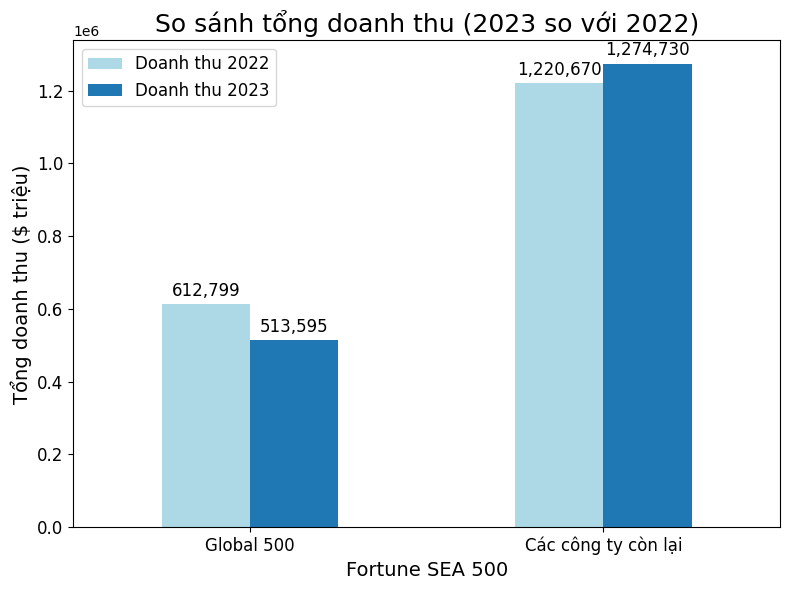

In [25]:
grouped_revenues_compared = df.groupby('global_500')[['revenues ($m)', 'previous revenue ($m)']].sum()
grouped_revenues_compared = grouped_revenues_compared[['previous revenue ($m)', 'revenues ($m)']].sort_index(ascending=False)

# Plotting the comparison
fig, ax = plt.subplots(figsize=(8, 6))

# Bar plot for both years
colors = ['lightblue', 'tab:blue']
grouped_revenues_compared.plot(kind='bar', ax=ax, color=colors)


# ax.set_title('Total Revenues Comparison (2023 vs 2022)')
# ax.set_xlabel('SEA 500 Membership')
# ax.set_ylabel('Total Revenue ($m)')
# ax.set_xticklabels(['Non-Global 500', 'Global 500'], rotation=0)

ax.legend(['Doanh thu 2022', 'Doanh thu 2023'], fontsize=12)
# for container in ax.containers:

    
    
ax.set_title('So sánh tổng doanh thu (2023 so với 2022)', fontsize=18)
ax.set_xlabel('Fortune SEA 500', fontsize=14)
ax.set_ylabel('Tổng doanh thu ($ triệu)', fontsize=14)
ax.set_xticklabels(['Global 500', 'Các công ty còn lại'], rotation=0, fontsize=12)
ax.tick_params(axis='y', labelsize=12)


for container in ax.containers:
#     ax.bar_label(container, label_type='edge', fontsize=12, padding=3)
    ax.bar_label(container, labels=[f'{int(label):,}' for label in container.datavalues], 
                 label_type='edge', fontsize=12, padding=3)


plt.tight_layout()
plt.show()

In [31]:
# Group by country and calculate the sum of current and previous revenues and profits
grouped = df.groupby('country').agg({
    'revenues ($m)': 'sum',
    'previous revenue ($m)': 'sum',
    'profits ($m)': 'sum',
    'previous profit ($m)': 'sum'
}).reset_index()


In [38]:
total = grouped[['revenues ($m)', 'previous revenue ($m)', 'profits ($m)', 'previous profit ($m)']].sum()

# Calculate the percentage changes for the whole region
total_revenue_percent_change = ((total['revenues ($m)'] - total['previous revenue ($m)']) / total['previous revenue ($m)']) * 100
total_profit_percent_change = ((total['profits ($m)'] - total['previous profit ($m)']) / total['previous profit ($m)']) * 100

# FIGURE 1
fig1 = go.Figure(data=[
    go.Bar(name='phần trăm doanh thu', x=['Khu vực ĐNÁ'], y=[total_revenue_percent_change], marker_color=my_deep_blue_color_pal[0]),
    go.Bar(name='phần trăm lợi nhuận', x=['Khu vực ĐNÁ'], y=[total_profit_percent_change], marker_color=my_deep_blue_color_pal[1])
])

annotation_text = (
    f"Năm 2023, các công ty kiếm được:<br>"
    f"⦿ doanh thu 1,79 nghìn tỷ USD,<br>giảm 45 tỷ USD so với năm 2022.<br>" 
    f"<br>"
    f"⦿ Lợi nhuận giảm còn 130 tỷ USD,<br>giảm 13,9 tỷ USD."
)

fig1.update_layout(
    title={
        'text': 'Doanh thu và lợi nhuận năm 2023 so với 2022 của Fortune 500 Khu vực Đông Nam Á',
        'x': 0.5,  # Center title
        'xanchor': 'center',
        'font': {'size': 28}  # Increase title font size
    },
    barmode='group',
    yaxis_title='Phần trăm thay đổi(%)',
    yaxis=dict(titlefont=dict(size=20), tickfont=dict(size=20)),  # Increase y-axis font size
    xaxis=dict(titlefont=dict(size=20), tickfont=dict(size=20)),  # Increase x-axis font size
    legend=dict(font=dict(size=20))  # Increase legend font size
    # annotations=[
    #     go.layout.Annotation(
    #         text=annotation_text,
    #         x=1.13, y=0.5,  # Adjust position as needed
    #         xref="paper", yref="paper",
    #         showarrow=False,
    #         font=dict(size=16, color='black'),  # Increase annotation font size
    #         align='left',
    #         bgcolor='Moccasin',
    #         bordercolor='black',
    #         borderwidth=1
    #     )
    # ]
)
fig1.show()

#FIGURE 2
# Calculate the percentage changes for each country
grouped['revenue percent change'] = ((grouped['revenues ($m)'] - grouped['previous revenue ($m)']) / grouped['previous revenue ($m)']) * 100
grouped['profit percent change'] = ((grouped['profits ($m)'] - grouped['previous profit ($m)']) / grouped['previous profit ($m)']) * 100

# Remove the "SEA Region" row for the second graph
grouped_countries = grouped[grouped['country'] != 'SEA Region']

fig2 = px.bar(grouped_countries, x='country', y=['revenue percent change', 'profit percent change'],
              title='Doanh thu và lợi nhuận năm 2023 so với 2022 của mỗi quốc gia trong Fortune SEA 500',
              barmode='group',
              labels={'value': 'Phần trăm thay đổi(%)', 'variable': 'Chỉ số', 'country': 'Quốc gia'},
              color_discrete_sequence=my_deep_blue_color_pal[:2])

# Translate the labels for the variables
fig2.for_each_trace(lambda t: t.update(name=t.name.replace('revenue percent change', 'phần trăm doanh thu').replace('profit percent change', 'phần trăm lợi nhuận')))

fig2.update_layout(
    title={
        'text': 'Doanh thu và lợi nhuận năm 2023 so với 2022 của mỗi quốc gia trong Fortune SEA 500',
        'x': 0.5,  # Center title
        'xanchor': 'center',
        'font': {'size': 28}  # Increase title font size
    },
    xaxis_title='Quốc gia',
    yaxis_title='Phần trăm thay đổi(%)',
    yaxis=dict(titlefont=dict(size=20), tickfont=dict(size=20)),  # Increase y-axis font size
    xaxis=dict(titlefont=dict(size=20), tickfont=dict(size=20)), 
    legend=dict(font=dict(size=20)) 
)

fig2.show()


In [103]:
# Create pie charts for each country
for country in countries:
    country_data = df[df['country'] == country]
    sector_distribution = country_data['sector'].value_counts().reset_index()
    sector_distribution.columns = ['sector', 'Count']
    
    fig = px.pie(sector_distribution, values='Count', names='sector', title=f'Phân bổ ngành ở {country}')
    fig.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10876\3060409629.py:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



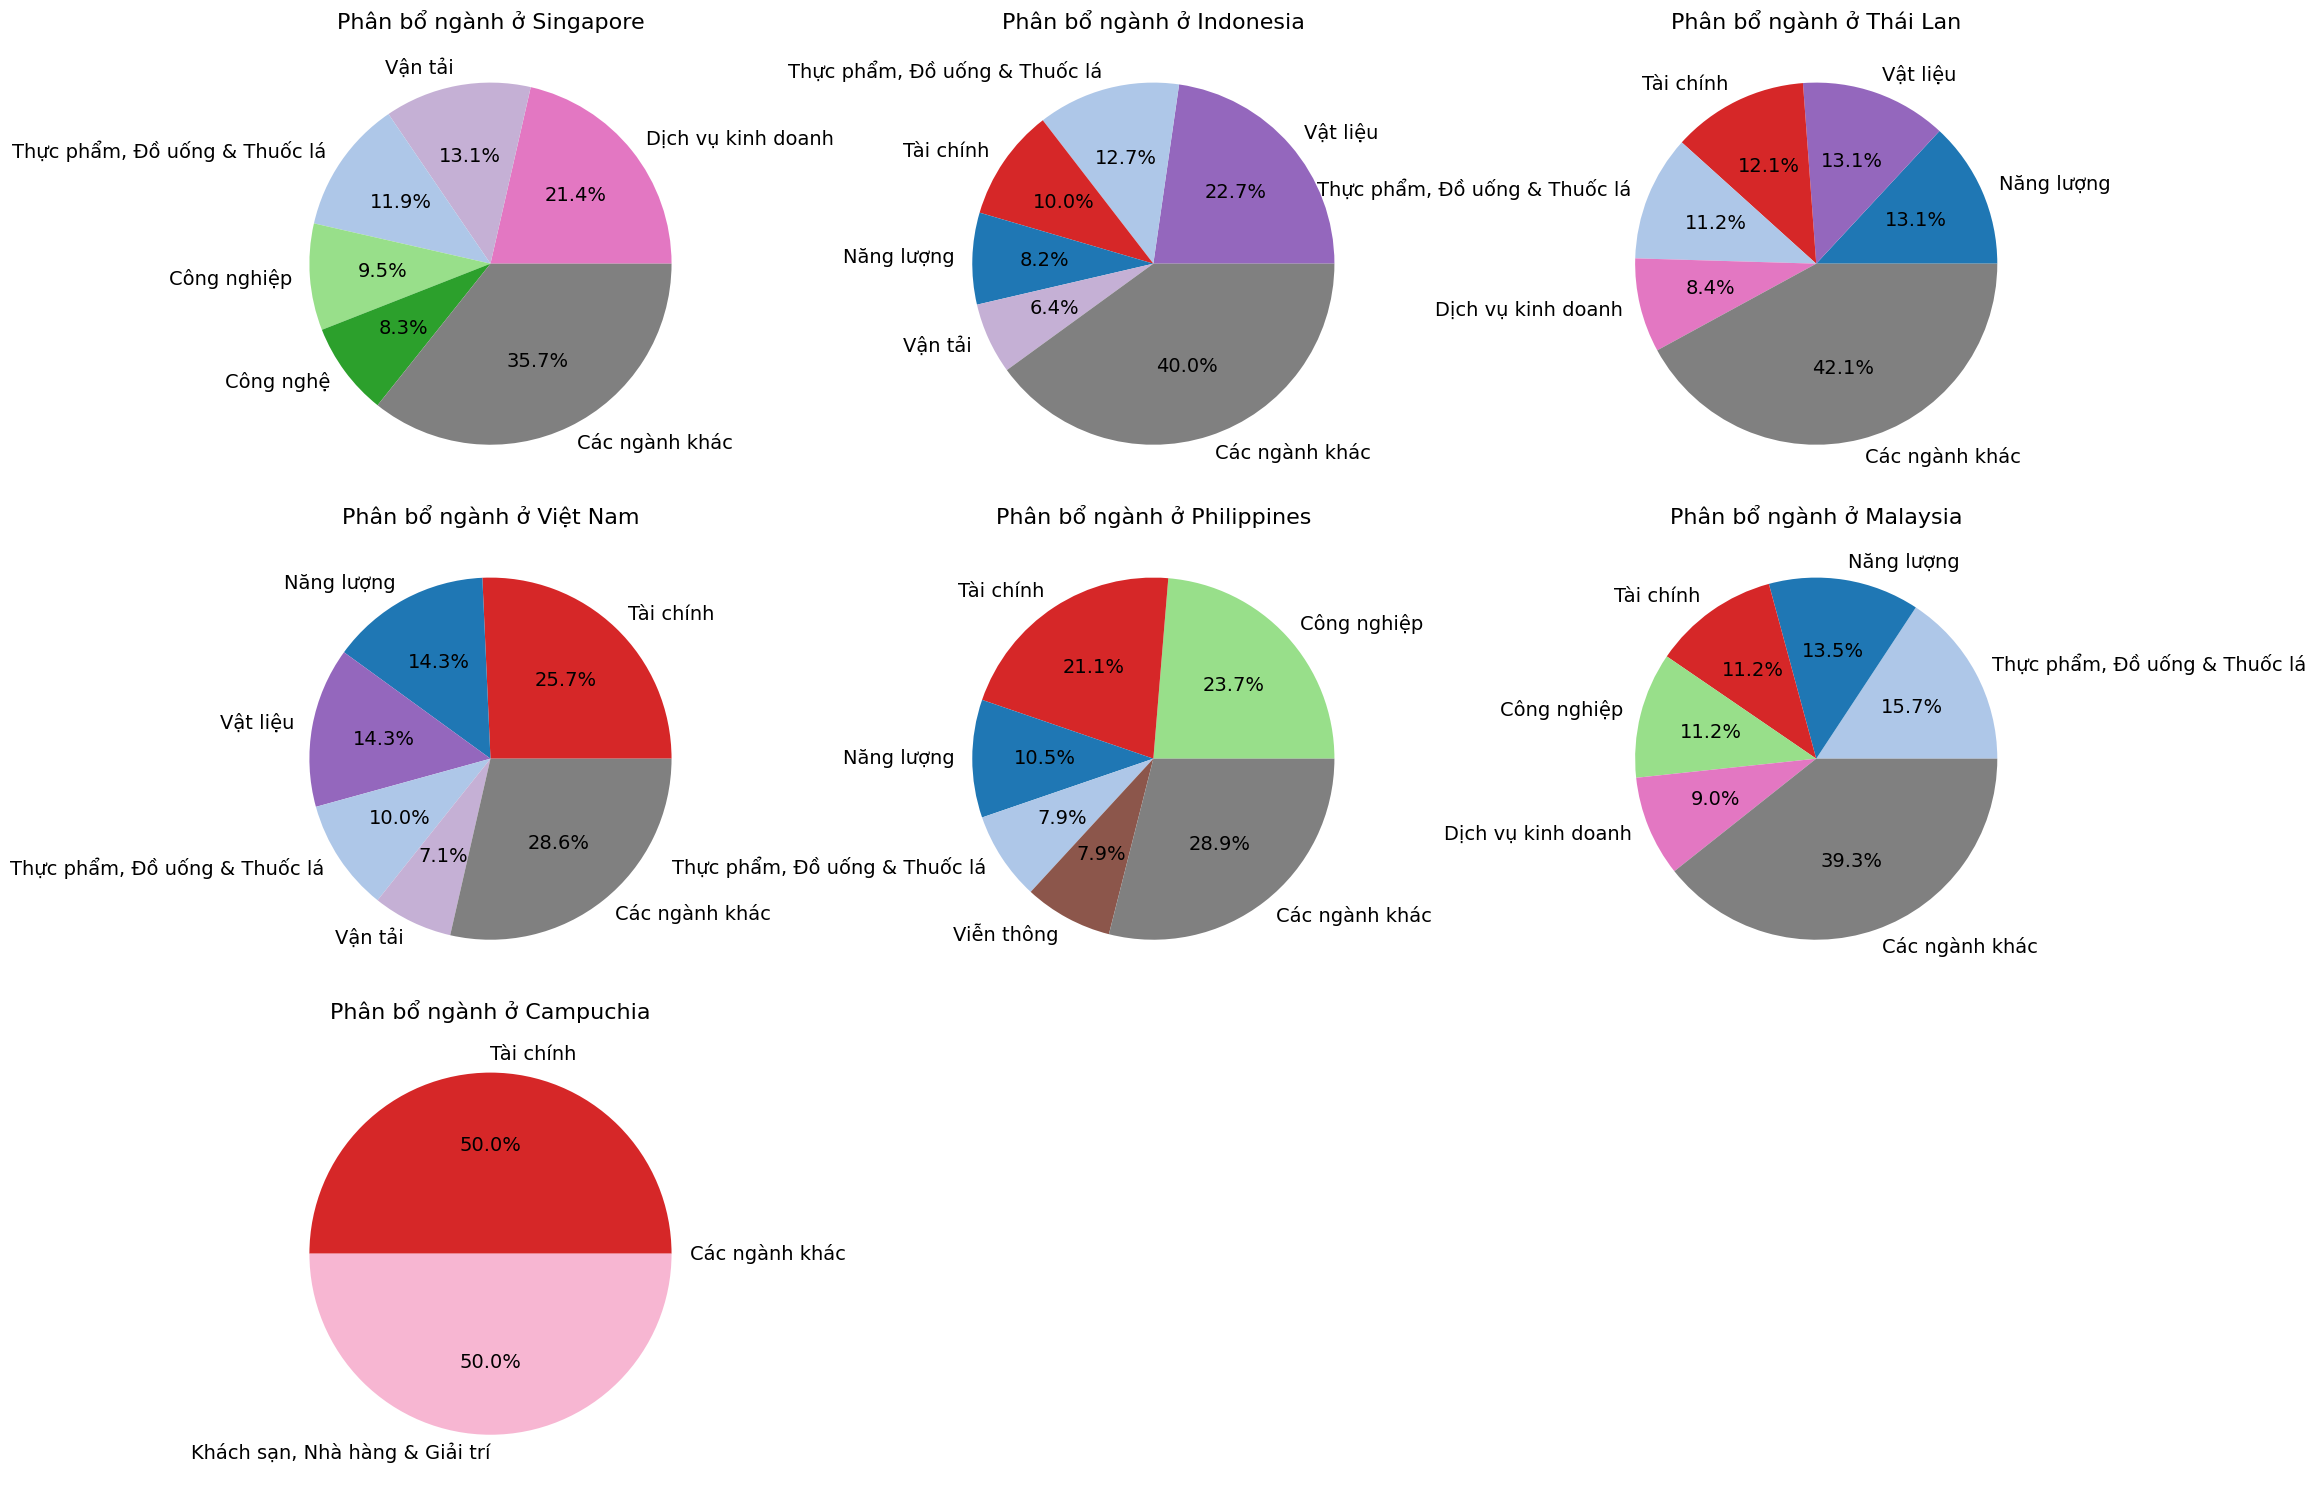

In [31]:
countries_of_interest = ['Singapore', 'Indonesia', 'Thái Lan', 'Việt Nam', 'Philippines', 'Malaysia', 'Campuchia']

top_n = 5
other_sector_label = "Các ngành khác"
gray_color = 'gray'

all_sectors = df['sector'].unique()

# Set up a color map to ensure consistent sector colors across all pies
colors = plt.cm.get_cmap('tab20', len(all_sectors))
sector_colors = {sector: colors(i) for i, sector in enumerate(all_sectors)}
sector_colors[other_sector_label] = gray_color

num_countries = len(countries_of_interest)
num_cols = 3
num_rows = (num_countries + num_cols - 1) // num_cols

# Create subplots with the specified grid layout
fig, axes = plt.subplots(num_rows, num_cols, figsize=(22, 5*num_rows))
axes = axes.flatten()

def make_autopct(size):
    def inner_autopct(pct):
        return f'{pct:.1f}%' if pct > 0 else ''
    return inner_autopct

# Loop through each country and create a pie chart
for i, country in enumerate(countries_of_interest):
    country_data_temp = df[df['country'] == country]
    sector_distribution = country_data_temp['sector'].value_counts()
    
    top_sectors = sector_distribution.nlargest(top_n)
    other_sectors_count = pd.Series({other_sector_label: sector_distribution.iloc[top_n:].sum()})
    final_distribution = pd.concat([top_sectors, other_sectors_count])
    
    colors_mapped = [sector_colors[sector] for sector in final_distribution.index]
    
    wedges, texts, autotexts = axes[i].pie(final_distribution, labels=final_distribution.index, 
                                           colors=colors_mapped, autopct=make_autopct(14), textprops={'fontsize': 14})
    

    axes[i].set_title(f'Phân bổ ngành ở {country}', fontsize=16)
    
    for text in texts:
        text.set_fontsize(14)
    for autotext in autotexts:
        autotext.set_fontsize(14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()


In [17]:
sector_employee_totals = df.groupby('sector')['employees'].sum().reset_index()
sector_employee_totals.columns = ['sector', 'Total Employees']

# Identify the top companies in each sector based on the number of employees
top_companies = df.loc[df.groupby('sector')['employees'].idxmax()][['sector', 'company', 'country', 'employees']]

# Create a bar chart for total employees in each sector
fig = px.bar(sector_employee_totals, x='sector', y='Total Employees', title='Tổng số nhân viên theo ngành')



# fig.update_layout(
#     xaxis_title='Ngành',
#     yaxis_title='Tổng số nhân viên',
#     xaxis={'categoryorder':'total descending'}
# )

fig.update_layout(
    title='Tổng số nhân viên theo ngành',
    xaxis_title='Ngành',
    yaxis_title='Tổng số nhân viên',
    font=dict(size=18),  # Increase the font size for the entire chart
    title_font=dict(size=24),  # Increase the title font size
    xaxis=dict(
        categoryorder='total descending',
        tickfont=dict(size=16)  # Increase the font size of x-axis tick labels
    ),
    yaxis=dict(
        tickfont=dict(size=16)  # Increase the font size of y-axis tick labels
    )
)
fig.show()

# Display the top companies in each sector
print("Top Companies in Each Sector:")
print(top_companies)


Top Companies in Each Sector:
                             sector                    company      country  \
18                         Bán buôn                   cp-axtra     Thái Lan   
43                           Bán lẻ     sumber-alfaria-trijaya    Indonesia   
81                Chăm sóc sức khỏe             ihh-healthcare     Malaysia   
26                      Công nghiệp             sm-investments  Philippines   
7                         Công nghệ                       flex    Singapore   
44               Dịch vụ kinh doanh                   vingroup     Việt Nam   
37   Hàng không vũ trụ & Quốc phòng             st-engineering    Singapore   
13                         Hóa chất          indorama-ventures     Thái Lan   
84   Khách sạn, Nhà hàng & Giải trí        minor-international     Thái Lan   
64              Kỹ thuật & Xây dựng                   seatrium    Singapore   
414                         May mặc               pan-brothers    Indonesia   
5                     

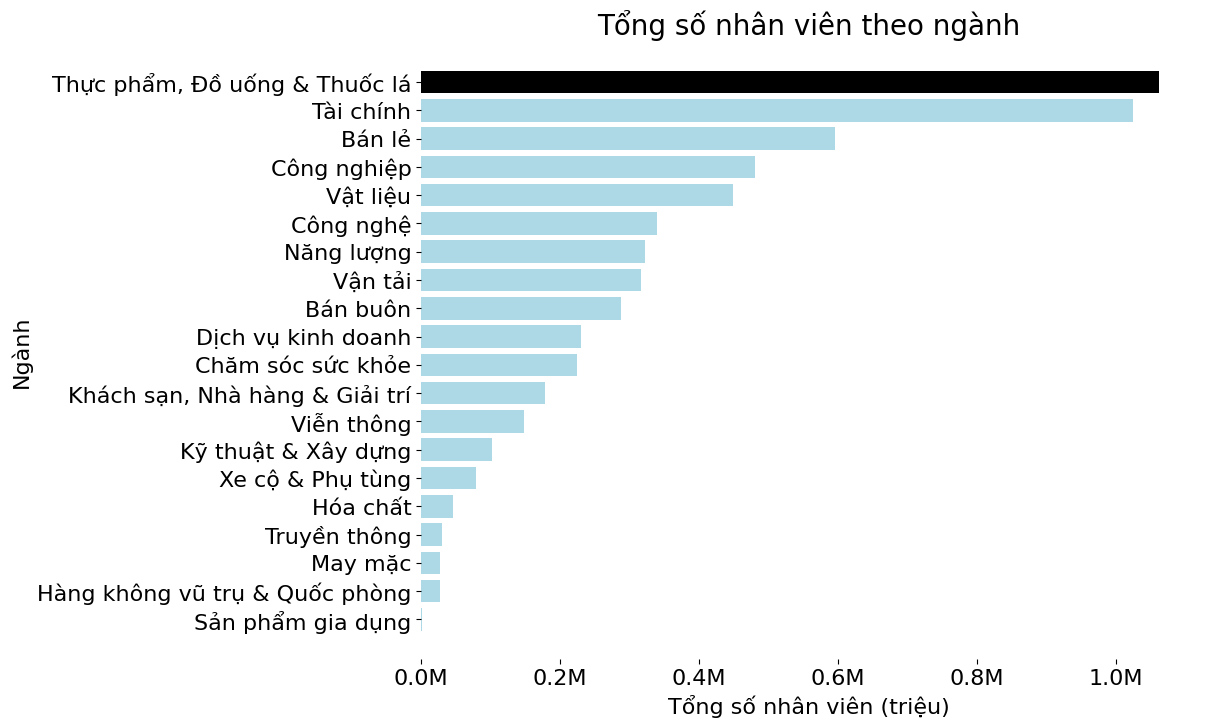

In [24]:
sector_employee_totals = df.groupby('sector')['employees'].sum().reset_index()
sector_employee_totals.columns = ['sector', 'Total Employees']

# Sort
sector_employee_totals = sector_employee_totals.sort_values('Total Employees', ascending=True)
max_index = sector_employee_totals['Total Employees'].idxmax()

# Convert the employee numbers to M
sector_employee_totals['Total Employees (M)'] = sector_employee_totals['Total Employees'] / 1e6

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
colors = ['lightblue' if i != max_index else 'black' for i in sector_employee_totals.index]

ax.barh(sector_employee_totals['sector'], sector_employee_totals['Total Employees (M)'], color=colors)

ax.set_xlabel('Tổng số nhân viên (triệu)', fontsize=16)
ax.set_ylabel('Ngành', fontsize=16)
ax.set_title('Tổng số nhân viên theo ngành', fontsize=20)

# Format x-axis to display numbers in millions with M suffix
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.1f}M'))
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

for spine in ax.spines.values():
    spine.set_visible(False)
    
plt.show()

Countries revenues

In [40]:
# Grouping by country and summing revenues
country_revenues = df.groupby('country')['revenues ($m)'].sum().reset_index()

country_revenues

,country,revenues ($m)
0,Campuchia,1359.4
1,Indonesia,321377.9
2,Malaysia,194923.9
3,Philippines,130939.1
4,Singapore,619407.2
5,Thái Lan,375880.4
6,Việt Nam,144437.4


In [53]:

# Create a bar chart for total revenues by country
fig = px.bar(country_revenues, x='country', y='revenues ($m)',
            #  title='Tổng doanh thu theo quốc gia',
             labels={'country': 'Quốc gia', 'revenues ($m)': 'Doanh thu ($M)'})

fig.update_traces(texttemplate='%{y:.2s}', textposition='outside', textfont=dict(size=20))

# Increase font sizes for title, axes, and ticks
fig.update_layout(
    # title={
    #     'text': 'Tổng doanh thu theo quốc gia',
    #     'x': 0.5,  # Center title
    #     'xanchor': 'center',
    #     'font': {'size': 28}  # Increase title font size
    # },
    xaxis_title='Quốc gia',
    yaxis_title='Doanh thu ($M)',
    yaxis=dict(titlefont=dict(size=22), tickfont=dict(size=20)),  # Increase y-axis font size
    xaxis=dict(titlefont=dict(size=22), tickfont=dict(size=20)),  # Increase x-axis font size
)

fig.show()

In [24]:
my_deep_blue_color_pal = [
    'RoyalBlue',
    'Blue',
    'MediumBlue',
    'DodgerBlue',
    'DeepSkyBlue',
    'SteelBlue',
    'DarkBlue',
    'Navy',
    'MidnightBlue',
    'CornflowerBlue'
]

C:\Users\Admin\AppData\Local\Temp\ipykernel_11632\2799311462.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Admin\AppData\Local\Temp\ipykernel_11632\2799311462.py:11: UserWarning:

The palette list has more values (10) than needed (3), which may not be intended.



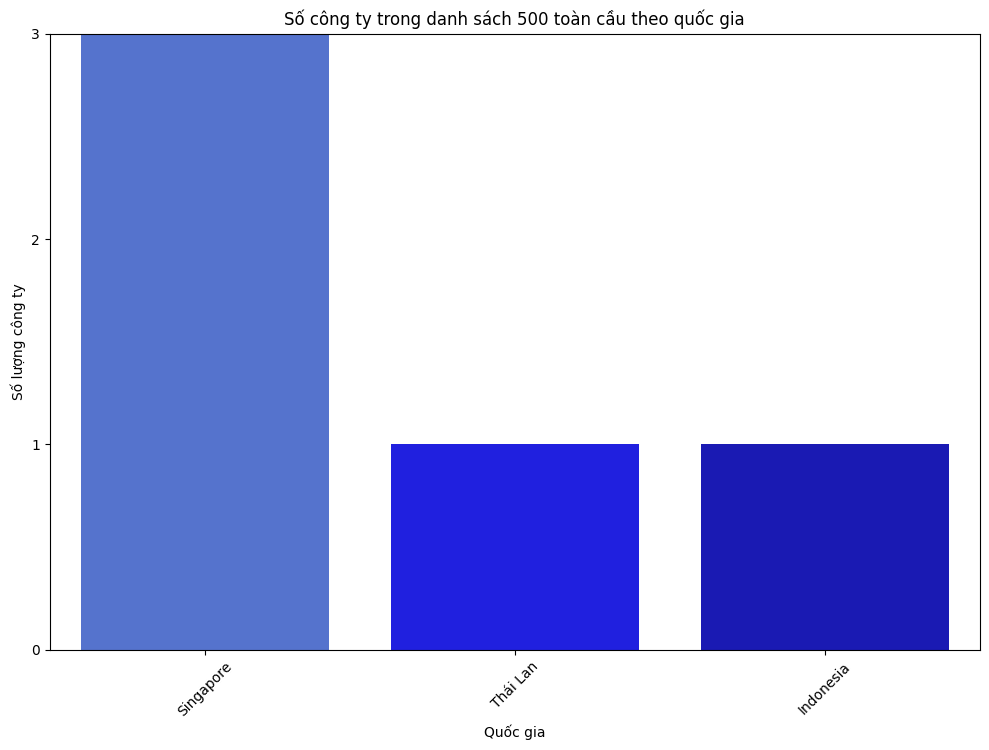

In [22]:


global_500_data = df[df['global_500']]

country_counts = global_500_data['country'].value_counts()

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(x=country_counts.index, y=country_counts.values, palette=my_deep_blue_color_pal)
plt.title('Số công ty trong danh sách 500 toàn cầu theo quốc gia')
plt.xlabel('Quốc gia')
plt.ylabel('Số lượng công ty')
plt.xticks(rotation=45)
plt.ylim(0,3)

plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True)) 

# plt.annotate(
#     text=(
#         'In the Fortune 1000 list of companies,\n'
#         'only {pw}% of the CEOs are women\n'
#         'and {pr}% of those women are in the Business Services sector\nsimiliar as Wholesaler.'
#         .format(pw=percent_woman, pr=percent_business)),
#     xy=(2.25, 8), xycoords='data', fontsize=10,backgroundcolor='Moccasin', color='black'
# )

plt.show()

In [25]:
# Display companies in each country
companies_by_country = global_500_data.groupby('country')['company'].apply(list)

print("Global 500 Companies by Country:")
for country, companies in companies_by_country.items():
    print(f"\n{country}:")
    for company in companies:
        print(f"  - {company}")

Global 500 Companies by Country:

Indonesia:
  - pertamina

Singapore:
  - trafigura-group
  - wilmar-international
  - olam-group

Thái Lan:
  - ptt


In [25]:
woman_df = df[['sector','company','ceo_woman']]
woman_df = df[df['ceo_woman']==True]
woman_df=woman_df.groupby(["sector"], as_index=False)["ceo_woman"].count().sort_values(by='ceo_woman',ascending=False)
woman_df

,sector,ceo_woman
0,Bán buôn,5
5,Dịch vụ kinh doanh,5
6,Năng lượng,3
7,"Thực phẩm, Đồ uống & Thuốc lá",3
8,Tài chính,3
9,Vận tải,3
2,Chăm sóc sức khỏe,2
10,Vật liệu,2
1,Bán lẻ,1
3,Công nghiệp,1


Trong số 500 công ty có tên trong danh sách của Fortune, chỉ 5.8% trong số đó có CEO là nữ.

In [34]:
percent_woman = round((woman_df['ceo_woman'].sum()), 1)
percent_woman

29

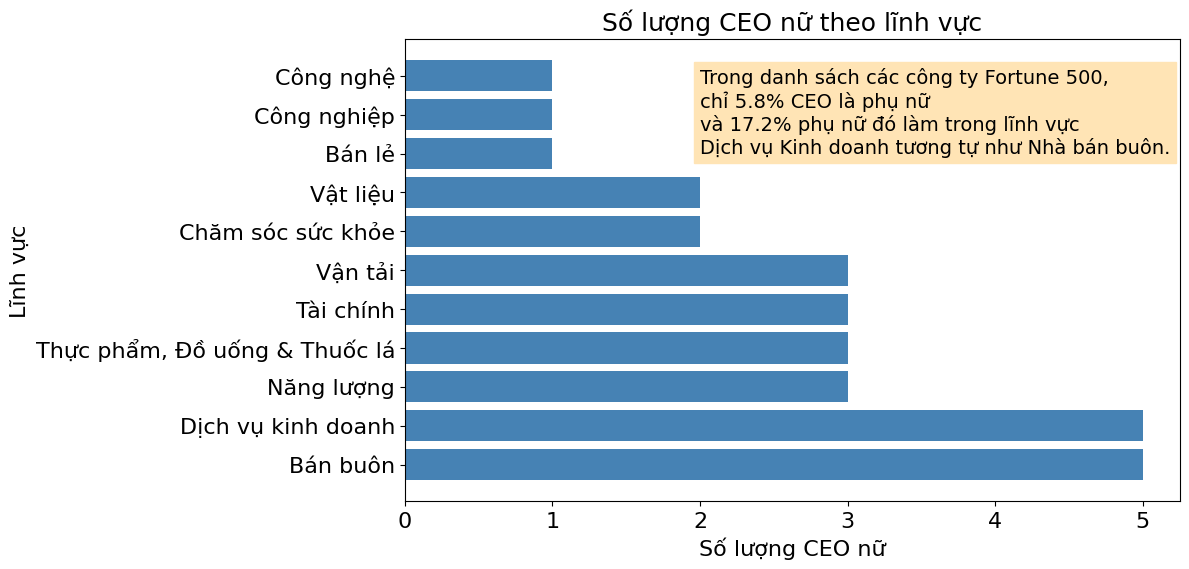

In [35]:
y = woman_df['sector']
width = woman_df['ceo_woman']

plt.figure(figsize=(10, 6))
plt.barh(y=y, width=width, color='SteelBlue')
plt.title('Số lượng CEO nữ theo lĩnh vực', fontsize=18, color='black')

percent_woman = round((woman_df['ceo_woman'].sum() / 500 * 100), 1)
percent_business = round((woman_df.iloc[1, 1] / woman_df['ceo_woman'].sum() * 100), 1)

plt.annotate(
    text=(
        'Trong danh sách các công ty Fortune 500,\n'
        'chỉ {pw}% CEO là phụ nữ\n'
        'và {pr}% phụ nữ đó làm trong lĩnh vực \nDịch vụ Kinh doanh tương tự như Nhà bán buôn.'
        .format(pw=percent_woman, pr=percent_business)),
    xy=(2, 8), xycoords='data', fontsize=14, backgroundcolor='Moccasin', color='black'
)

plt.xlabel('Số lượng CEO nữ', fontsize=16)
plt.ylabel('Lĩnh vực', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# plt.grid(axis='x', linestyle='--', alpha=0.7)
# plt.tight_layout()
plt.show()


In [40]:
woman_ceo = df[['company','profits ($m)','sector','ceo_woman','ceo']]
woman_ceo = woman_ceo[woman_ceo['ceo_woman']== True].sort_values(by='profits ($m)', ascending=False)
woman_ceo.head(3)  

,company,profits ($m),sector,ceo_woman,ceo
11,oversea-chinese-banking,5229.2,Tài chính,True,Helen Wong
2,pertamina,4441.4,Năng lượng,True,Nicke Widyawati
30,kasikornbank,1219.3,Tài chính,True,Kattiya Indaravijaya


eplxain detailS:

3. Which sectors are the most profitable?

In [41]:
# # Top performing Sector
sector_df=df[['company','profits ($m)','sector']]
sector_sum_df=sector_df.groupby(['sector'], as_index = False).sum('profits ($m)').sort_values(
    by=['profits ($m)'], ascending = False)

sector_sum_df.rename(columns = {
    'sector':'sector',
    'profits ($m)':'sum_profit'}, inplace = True)

sector_sum_df = sector_sum_df.head(5)

sector_sum_df.head(3)

,sector,sum_profit
15,Tài chính,56636.8
11,Năng lượng,24561.4
3,Công nghiệp,9264.8


In [42]:
sector_sum_df

,sector,sum_profit
15,Tài chính,56636.8
11,Năng lượng,24561.4
3,Công nghiệp,9264.8
18,Vật liệu,7802.5
13,"Thực phẩm, Đồ uống & Thuốc lá",6615.0


In [22]:
my_color_pal = [
    'MediumSeaGreen',
    'LightSeaGreen',
    'MediumAquaMarine',
    'LightSkyBlue',
    'LightSteelblue',
    'PowderBlue',
    'Plum',
    'LightSalmon',
    'LightPink',
    'Moccasin',
]

<Axes: >

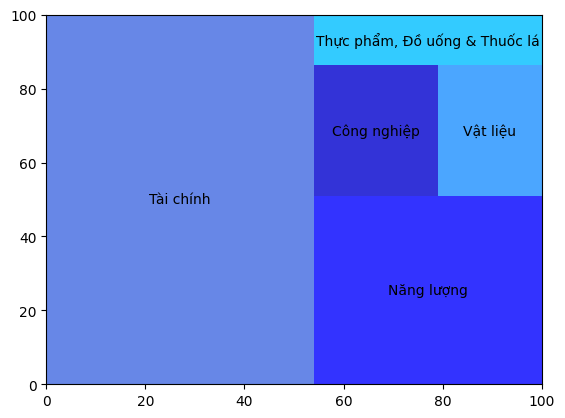

In [50]:
import squarify

squarify.plot(sizes=sector_sum_df['sum_profit'],
              label=sector_sum_df['sector'],
              alpha=0.8,
              text_kwargs={'fontsize':10},
              color=my_deep_blue_color_pal)

# Fill the missing Market Cap value

In [31]:
import pandas as pd

df = pd.read_csv("sea_fortune_500.csv")
df = df.iloc[:, 1:]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rank                        500 non-null    int64  
 1   company                     500 non-null    object 
 2   industry                    500 non-null    object 
 3   headquarters city           500 non-null    object 
 4   country                     500 non-null    object 
 5   revenues ($m)               500 non-null    float64
 6   revenue percent change      500 non-null    float64
 7   profits ($m)                500 non-null    float64
 8   profits percent change      500 non-null    float64
 9   assets ($m)                 500 non-null    float64
 10  profitable                  500 non-null    bool   
 11  sector                      500 non-null    object 
 12  employees                   500 non-null    float64
 13  ceo                         470 non

In [33]:
knn_data = df[['revenues ($m)', 'profits ($m)', 'assets ($m)', 'market value ($m)']]

In [6]:
knn_data = df[['Revenues ($M)', 'Profits ($M)', 'Assets ($M)', 'Market value ($M)']]

In [4]:

# ####################################################################################################################
# ############################################DO NOT RUN THIS############################################
# ####################################################################################################################
# import pandas as pd
# import numpy as np
# from sklearn.impute import KNNImputer


# # Select relevant columns for KNN imputation
# knn_data = df[['revenues ($m)', 'profits ($m)', 'assets ($m)', 'market value ($m)']]

# # Apply KNN imputation
# knn_imputer = KNNImputer(n_neighbors=10)
# knn_data_imputed = knn_imputer.fit_transform(knn_data)

# # Convert the imputed data back to a DataFrame
# knn_data_imputed_df = pd.DataFrame(knn_data_imputed, columns=knn_data.columns)

# # Update the original DataFrame with the imputed values
# df['market value ($m)'] = knn_data_imputed_df['market value ($m)']

# # Randomly select 6 indices and reset their 'market value ($m)' to NaN
# random_indices = np.random.choice(df.index, size=6, replace=False)
# df.loc[random_indices, 'market value ($m)'] = np.nan

# # Save the data with 6 missing values to a new CSV file
# df.to_csv('knn_imputed_data_with_missing.csv', index=False)
# df1 = pd.read_csv('knn_imputed_data_with_missing.csv')  # Assuming this CSV has a column 'market value ($m)'
# df2 = pd.read_csv('see_fortune_500_real.csv')  # Assuming this CSV has a column 'Market value ($M)'

# def format_market_value(value):
#     if pd.isna(value):
#         return None  # Or return a placeholder like "$0"
#     return f"${int(value):,}"

# # Convert market value from the first CSV to the desired format
# df1['Market value ($M)'] = df1['market value ($m)'].apply(format_market_value)

# # Update the second DataFrame with the formatted values
# df2['Market value ($M)'] = df1['Market value ($M)']

# # Optionally, save df2 with the updated values
# df2.to_csv('updated_second_file.csv', index=False)
# df2.head(5)


In [70]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=10)
knn_data_imputed = knn_imputer.fit_transform(knn_data)

# Convert the imputed data back to a DataFrame
knn_data_imputed_df = pd.DataFrame(knn_data_imputed, columns=knn_data.columns)

# Update the original DataFrame with the imputed values
df['market value ($m)'] = knn_data_imputed_df['market value ($m)']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rank                        500 non-null    int64  
 1   company                     500 non-null    object 
 2   industry                    500 non-null    object 
 3   headquarters city           500 non-null    object 
 4   country                     500 non-null    object 
 5   revenues ($m)               500 non-null    float64
 6   revenue percent change      500 non-null    float64
 7   profits ($m)                500 non-null    float64
 8   profits percent change      500 non-null    float64
 9   assets ($m)                 500 non-null    float64
 10  profitable                  500 non-null    bool   
 11  sector                      500 non-null    object 
 12  employees                   500 non-null    float64
 13  ceo                         470 non

In [34]:
from sklearn.impute import KNNImputer
import numpy as np

knn_imputer = KNNImputer(n_neighbors=10)
knn_data_imputed = knn_imputer.fit_transform(knn_data)

# Convert the imputed data back to a DataFrame
knn_data_imputed_df = pd.DataFrame(knn_data_imputed, columns=knn_data.columns)


df['Market value ($M) (imputed)'] = knn_data_imputed_df['market value ($m)']
df['Market Value Imputed'] = np.where(df['market value ($m)'].isna(), 'Imputed', 'Original')

In [73]:
df.head(2)

,company,industry,headquarters city,country,revenues ($m),revenue percent change,profits ($m),profits percent change,assets ($m),profitable,...,market value ($m),ceo_woman,fastest_growing_company,change_the_world,world_most_admired_company,global_500,previous revenue ($m),previous profit ($m),Market value ($M) (imputed),Market Value Imputed
0,trafigura-group,Thương mại,Singapore,Singapore,244280.2,-23.3,7393.2,5.7,83383.0,True,...,13316.0,False,False,False,False,True,318487.874837,6994.512772,13316.0,Original
1,ptt,Lọc dầu,Bangkok,Thái Lan,90418.7,-6.0,3221.1,23.5,100741.0,True,...,26001.0,False,False,False,False,True,96190.106383,2608.178138,26001.0,Original


In [80]:
df[df['Market Value Imputed'] == 'Imputed']

,company,industry,headquarters city,country,revenues ($m),revenue percent change,profits ($m),profits percent change,assets ($m),profitable,...,market value ($m),ceo_woman,fastest_growing_company,change_the_world,world_most_admired_company,global_500,previous revenue ($m),previous profit ($m),Market value ($M) (imputed),Market Value Imputed
8,san-miguel,Đồ uống,Thành phố Mandaluyong,Philippines,26023.9,-6.1,3.6,101.5,44401.0,True,...,NaN,False,False,False,False,False,27714.483493,1.786600,12773.7,Imputed
9,dbs-group-holdings,Ngân hàng Thương mại,Singapore,Singapore,25607.6,64.2,7494.9,26.0,560586.0,True,...,NaN,False,False,False,False,False,15595.371498,5948.333333,24011.3,Imputed
98,military-bank-(mb-bank),Ngân hàng Thương mại,Hà Nội,Việt Nam,3688.0,18.0,868.1,16.1,38951.0,True,...,NaN,False,False,False,False,False,3125.423729,747.717485,8127.7,Imputed
243,basic-energy,Năng lượng,Thành phố Mandaluyong,Philippines,1152.6,-16.1,0.8,-55.7,537.9,True,...,NaN,False,False,False,False,False,1373.778308,1.805869,497.5,Imputed
292,prima-andalan-mandiri,"Khai thác, Sản xuất Dầu thô",Jakarta,Indonesia,917.1,-13.9,227.8,-35.3,745.0,True,...,NaN,False,False,False,False,False,1065.156794,352.086553,1496.8,Imputed
299,nam-a-bank,Ngân hàng Thương mại,Thành phố Hồ Chí Minh,Việt Nam,883.9,48.0,110.1,42.3,8652.0,True,...,NaN,False,False,False,False,False,597.229730,77.371750,2786.9,Imputed


Revenues ($M)', 'Profits ($M)', 'Assets ($M)', 'Market value ($M)

revenues ($m)', 'profits ($m)', 'assets ($m)', 'market value ($m)

In [6]:
import plotly.express as px

# Scatter plot for Profits vs Market Value
fig1 = px.scatter(df, x='profits ($m)', y='Market value ($M) (imputed)',
                  color='Market Value Imputed',
                  title='Profits vs Market Value',
                  labels={'profits ($m)': 'Profits ($M)', 'Market value ($M) (imputed)': 'Market value ($M)'},
                  template='plotly_dark')

fig1.update_layout(
    title_font=dict(size=24),  # Increase title font size
    xaxis_title_font=dict(size=20),  
    yaxis_title_font=dict(size=20),  
    legend_font=dict(size=16), 
    xaxis=dict(tickfont=dict(size=14)),  
    yaxis=dict(tickfont=dict(size=14))  
)
fig1.show()

# Scatter plot for Assets vs Market Value
fig2 = px.scatter(df, x='assets ($m)', y='Market value ($M) (imputed)',
                  color='Market Value Imputed',
                  title='Assets vs Market Value ',
                  labels={'assets ($m)': 'Assets ($M)', 'Market value ($M) (imputed)': 'Market value ($M)'},
                  template='plotly_dark')

fig2.update_layout(
    title_font=dict(size=24),
    xaxis_title_font=dict(size=20),
    yaxis_title_font=dict(size=20),
    legend_font=dict(size=16),
    xaxis=dict(tickfont=dict(size=14)),
    yaxis=dict(tickfont=dict(size=14))
)
fig2.show()

# Scatter plot for Revenues vs Market Value
fig4 = px.scatter(df, x='revenues ($m)', y='Market value ($M) (imputed)',
                  color='Market Value Imputed',
                  title='Revenues vs Market Value',
                  labels={'revenues ($m)': 'Revenues ($M)', 'Market value ($M) (imputed)': 'Market value ($M)'},
                  template='plotly_dark')

fig4.update_layout(
    title_font=dict(size=24),
    xaxis_title_font=dict(size=20),
    yaxis_title_font=dict(size=20),
    legend_font=dict(size=16),
    xaxis=dict(tickfont=dict(size=14)),
    yaxis=dict(tickfont=dict(size=14))
)
fig4.show()


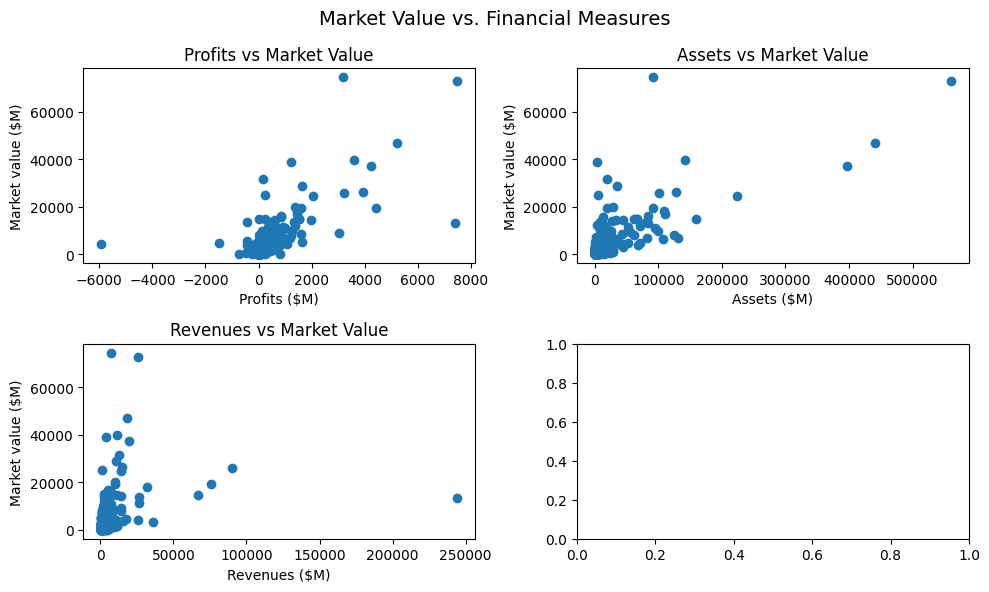

In [18]:
import matplotlib.pyplot as plt
import pandas as pd  


# Create the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))  

# Scatter plots for each subplot
axes[0, 0].scatter(df['Profits ($M)'], df['Market value ($M) (imputed)'])
axes[0, 1].scatter(df['Assets ($M)'], df['Market value ($M) (imputed)'])
axes[1, 0].scatter(df['Revenues ($M)'], df['Market value ($M) (imputed)'])

# Add labels and title
axes[0, 0].set_xlabel('Profits ($M)')
axes[0, 0].set_ylabel('Market value ($M)')
axes[0, 0].set_title('Profits vs Market Value')

axes[0, 1].set_xlabel('Assets ($M)')
axes[0, 1].set_ylabel('Market value ($M)')
axes[0, 1].set_title('Assets vs Market Value')

axes[1, 0].set_xlabel('Revenues ($M)')
axes[1, 0].set_ylabel('Market value ($M)')
axes[1, 0].set_title('Revenues vs Market Value')

# Adjust layout (optional)
fig.suptitle('Market Value vs. Financial Measures', fontsize=14)
plt.tight_layout()

# Display the plot
plt.show()


In [9]:
grouped = df.groupby(['Headquarters City', 'Country']).size().reset_index(name='Total')

print(grouped)

       Country  Total
0     Cambodia      2
1    Indonesia    110
2     Malaysia     89
3  Philippines     38
4    Singapore     84
5     Thailand    107
6      Vietnam     70


In [10]:
import plotly.express as px

df_sector = df.dropna(subset=['Market value ($M)', 'Sector'])

# Plot Market value by Sector
fig_sector = px.box(df_sector, x='Sector', y='Market value ($M)', title='Market Value by Sector', 
                    labels={'Market value ($M)': 'Market Value ($M)'}, template='plotly_dark')
fig_sector.show()

In [13]:
# Plot Market value by Sector using a dot plot
fig_sector_dot = px.strip(df_sector, x='Market value ($M)', y='Sector', title='Market Value by Sector', 
                          labels={'Market value ($M)': 'Market Value ($M)'}, template='plotly_dark')
fig_sector_dot.show()

In [11]:
df_country = df.dropna(subset=['Market value ($M)', 'Country'])

# Plot Market value by Country
fig_country = px.box(df_country, x='Country', y='Market value ($M)', title='Market Value by Country', 
                     labels={'Market value ($M)': 'Market Value ($M)'}, template='plotly_dark')
fig_country.show()

In [14]:
# Plot Market value by Country using a dot plot
fig_country_dot = px.strip(df_country, x='Market value ($M)', y='Country', title='Market Value by Country', 
                           labels={'Market value ($M)': 'Market Value ($M)'}, template='plotly_dark')
fig_country_dot.show()

In [17]:
grouped.to_csv('countries_frequency.csv')

# Company Market Cap Prediction

In [35]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import warnings
warnings.filterwarnings(action='ignore')

In [36]:
df.rename(columns = {'Market value ($M) (imputed)':'Market Cap'}, inplace = True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   rank                        500 non-null    int64  
 1   company                     500 non-null    object 
 2   industry                    500 non-null    object 
 3   headquarters city           500 non-null    object 
 4   country                     500 non-null    object 
 5   revenues ($m)               500 non-null    float64
 6   revenue percent change      500 non-null    float64
 7   profits ($m)                500 non-null    float64
 8   profits percent change      500 non-null    float64
 9   assets ($m)                 500 non-null    float64
 10  profitable                  500 non-null    bool   
 11  sector                      500 non-null    object 
 12  employees                   500 non-null    float64
 13  ceo                         470 non

In [38]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop unused columns
    df = df.drop(['rank', 'global_500', 'company', 'market value ($m)', 'ceo', 'website', 'Market Value Imputed'], axis=1)
    
    
    # Binary encoding
    for column in ['fastest_growing_company', 'change_the_world', 'world_most_admired_company', 'ceo_woman', 'profitable']:
        df[column] = df[column].replace({'False': 0, 'True': 1})
    
    # One-hot encoding
    for column in ['industry', 'sector', 'country', 'headquarters city']:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    
    # Split df into X and y
    y = df['Market Cap']
    X = df.drop('Market Cap', axis=1)
    
    # # Ensure all columns are numerical
    # numerical_cols = X.select_dtypes(include=['number']).columns
    # X = X[numerical_cols]

    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [39]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [40]:
X_train

,revenues ($m),revenue percent change,profits ($m),profits percent change,assets ($m),profitable,employees,ceo_woman,fastest_growing_company,change_the_world,...,headquarters city_Thành phố Paranaque,headquarters city_Thành phố Pasay,headquarters city_Thành phố Pasig,headquarters city_Thành phố Quezon,headquarters city_Thành phố Taguig,headquarters city_Thủ Dầu Một,headquarters city_Tuy Hòa,headquarters city_Tân Châu,headquarters city_Ubon Ratchathani,headquarters city_Vinh
13,0.780368,-0.852590,-0.666586,-0.167751,0.057295,-2.953341,0.836742,-0.246183,0.0,-0.07581,...,0.0,-0.07581,-0.053529,-0.107521,-0.07581,-0.053529,-0.053529,-0.053529,-0.053529,-0.053529
61,0.099738,0.007012,1.248561,0.040301,1.265229,0.338600,0.762729,-0.246183,0.0,-0.07581,...,0.0,-0.07581,-0.053529,-0.107521,-0.07581,-0.053529,-0.053529,-0.053529,-0.053529,-0.053529
298,-0.201648,-0.485152,-0.238041,0.021375,-0.315698,0.338600,-0.509351,-0.246183,0.0,-0.07581,...,0.0,-0.07581,-0.053529,-0.107521,-0.07581,-0.053529,-0.053529,-0.053529,-0.053529,-0.053529
39,0.227187,0.216013,3.320091,0.047559,1.737470,0.338600,0.658930,-0.246183,0.0,-0.07581,...,0.0,-0.07581,-0.053529,-0.107521,-0.07581,-0.053529,-0.053529,-0.053529,-0.053529,-0.053529
360,-0.214807,-0.508749,-0.275117,-0.079236,-0.313934,0.338600,0.288264,-0.246183,0.0,-0.07581,...,0.0,-0.07581,-0.053529,-0.107521,-0.07581,-0.053529,-0.053529,-0.053529,-0.053529,-0.053529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,-0.189060,2.906059,-0.264313,0.076305,-0.267590,0.338600,-0.539036,-0.246183,0.0,-0.07581,...,0.0,-0.07581,-0.053529,-0.107521,-0.07581,-0.053529,-0.053529,-0.053529,-0.053529,-0.053529
72,0.080580,-1.371721,-0.131473,-0.098305,-0.037248,0.338600,-0.305838,-0.246183,0.0,-0.07581,...,0.0,-0.07581,-0.053529,-0.107521,-0.07581,-0.053529,-0.053529,-0.053529,-0.053529,-0.053529
396,-0.220084,0.057576,-0.313787,-0.147828,-0.329721,-2.953341,-0.600050,-0.246183,0.0,-0.07581,...,0.0,-0.07581,-0.053529,-0.107521,-0.07581,-0.053529,-0.053529,-0.053529,-0.053529,-0.053529
235,-0.179832,-0.751460,-0.225757,0.088686,-0.285390,0.338600,-0.395939,-0.246183,0.0,-0.07581,...,0.0,-0.07581,-0.053529,-0.107521,-0.07581,-0.053529,-0.053529,-0.053529,-0.053529,-0.053529


In [28]:
y_train

13      3619.0
61     12059.0
298      681.0
39     74482.0
360      622.0
        ...   
255     1037.0
72      1500.0
396       15.0
235     1117.0
37      9219.0
Name: Market Cap, Length: 350, dtype: float64

### Training

In [29]:
models = {
    "     Linear Regression": LinearRegression(),
    "Linear Regression (L2)": Ridge(),
    "Linear Regression (L1)": Lasso(),
    "         Decision Tree": DecisionTreeRegressor(),
    "        Neural Network": MLPRegressor(),
    "         Random Forest": RandomForestRegressor(),
    "     Gradient Boosting": GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

     Linear Regression trained.
Linear Regression (L2) trained.
Linear Regression (L1) trained.
         Decision Tree trained.
        Neural Network trained.
         Random Forest trained.
     Gradient Boosting trained.


###  Results

In [30]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    rmse = np.sqrt(np.mean((y_test - y_pred)**2))
    print(name + " RMSE: {:.2f}".format(rmse))

     Linear Regression RMSE: 103517167159757376.00
Linear Regression (L2) RMSE: 4541.45
Linear Regression (L1) RMSE: 4706.46
         Decision Tree RMSE: 4428.42
        Neural Network RMSE: 6624.49
         Random Forest RMSE: 3784.42
     Gradient Boosting RMSE: 3866.92


In [31]:
for name, model in models.items():
    r2 = model.score(X_test, y_test)
    print(name + " R^2 Score: {:.5f}".format(r2))

     Linear Regression R^2 Score: -303728039753619420953444352.00000
Linear Regression (L2) R^2 Score: 0.41541
Linear Regression (L1) R^2 Score: 0.37216
         Decision Tree R^2 Score: 0.44415
        Neural Network R^2 Score: -0.24384
         Random Forest R^2 Score: 0.59406
     Gradient Boosting R^2 Score: 0.57617


<Axes: ylabel='Frequency'>

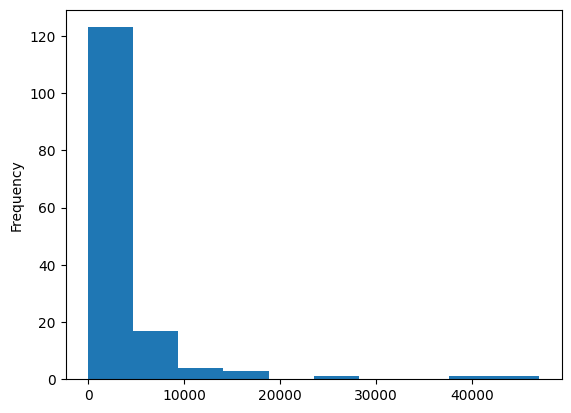

In [32]:
y_test.plot(kind="hist")

In [34]:
model

GradientBoostingRegressor()

### hypothesis testing

In [33]:
import numpy as np

# Define the number of permutations
n_permutations = 1000
permuted_scores = np.zeros(n_permutations)

# Calculate the observed R^2 score
observed_r2 = model.score(X_test, y_test)

# Perform permutation test
for i in range(n_permutations):
    y_permuted = np.random.permutation(y_test)
    permuted_score = model.score(X_test, y_permuted)
    permuted_scores[i] = permuted_score

# Calculate the p-value
p_value = np.sum(permuted_scores >= observed_r2) / n_permutations

print(f"Observed R^2: {observed_r2}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis - there is a significant relationship between the predictors and the target variable.")
else:
    print("Fail to reject the null hypothesis - there is no significant relationship between the predictors and the target variable.")


Observed R^2: 0.5761711626873262
P-value: 0.0
Reject the null hypothesis - there is a significant relationship between the predictors and the target variable.


# Optimize Parameters

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the expanded parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
    'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, None],
    'min_samples_split': [2, 3, 5, 7, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'bootstrap': [True, False]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=3, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 50}


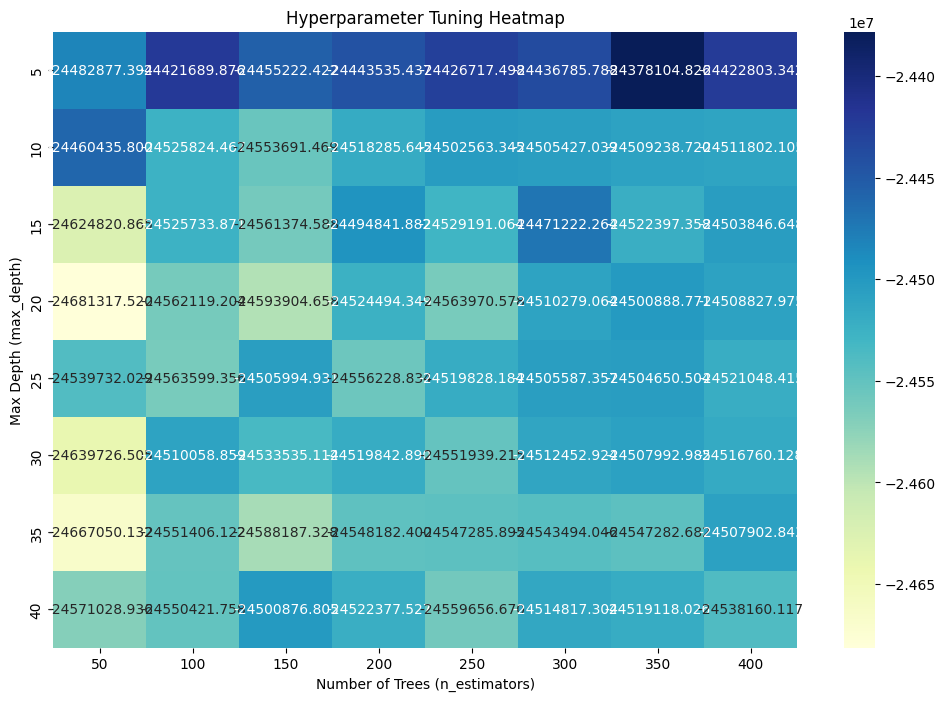

In [51]:
import seaborn as sns
import pandas as pd

results = pd.DataFrame(grid_search.cv_results_)

# Use pivot_table instead of pivot to reshape the DataFrame
pivot_table = results.pivot_table(values="mean_test_score", 
                                  index="param_max_depth", 
                                  columns="param_n_estimators")

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Hyperparameter Tuning Heatmap")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Max Depth (max_depth)")
plt.show()

In [48]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


In [52]:
import joblib

# Save the model to a file
joblib.dump(best_rf, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

In [58]:
from sklearn.metrics import r2_score

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Calculate and print the Mean Squared Error
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
r2 = r2_score(y_test, y_pred)
print(f"Test Set RMSE: {rmse}")
print(f"Test Set R^2: {r2}")

Test Set RMSE: 3372.209698385291
Test Set R^2: 0.675007556366612


In [54]:
# Get feature importances
importances = best_rf.feature_importances_

# Create a sorted list of feature importances
sorted_indices = importances.argsort()[::-1]

# Print the feature importances
for idx in sorted_indices:
    print(f"Feature: {X_train.columns[idx]}, Importance: {importances[idx]}")

Feature: profits ($m), Importance: 0.5525559683549324
Feature: revenues ($m), Importance: 0.1902639147010131
Feature: assets ($m), Importance: 0.09634491513880847
Feature: previous revenue ($m), Importance: 0.0399524754251965
Feature: previous profit ($m), Importance: 0.03446685247155204
Feature: employees, Importance: 0.02872183606781349
Feature: revenue percent change, Importance: 0.014903090143266589
Feature: profits percent change, Importance: 0.014346565609279433
Feature: headquarters city_Jakarta, Importance: 0.007105316534235018
Feature: country_Indonesia, Importance: 0.003421508127366138
Feature: sector_Tài chính, Importance: 0.002831050417813318
Feature: country_Singapore, Importance: 0.00228127146025531
Feature: headquarters city_Kuala Lumpur, Importance: 0.002260773391218726
Feature: headquarters city_Singapore, Importance: 0.0020280122696348826
Feature: industry_Dịch vụ Internet và Bán lẻ, Importance: 0.001820396560903432
Feature: industry_Viễn thông, Importance: 0.00156478

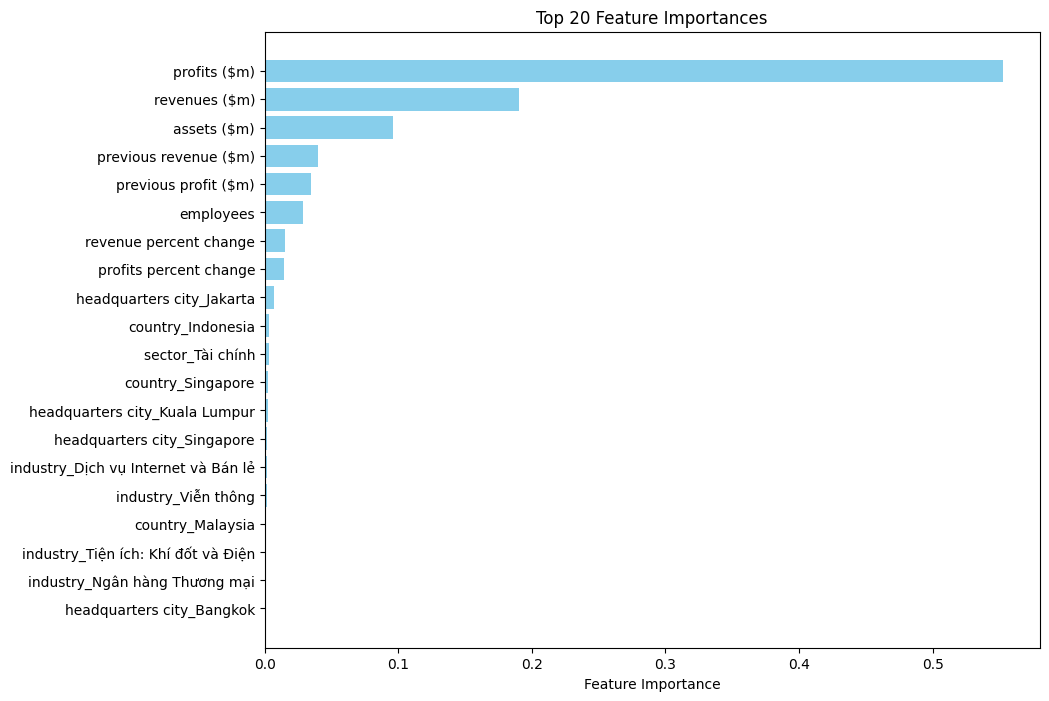

In [55]:
indices = np.argsort(importances)[-20:]

# Get the names of the top 20 features
top_features = [X_train.columns[i] for i in indices]

# Plot the top 20 feature importances
plt.figure(figsize=(10, 8))
plt.barh(top_features, importances[indices], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances')
plt.show()